<h1><center>CSCI - 6409/4146 - The Process of Data Science - Fall 2022</h1>
<h1><center>Group 10: Project</h1>
<center><br>

<b>Sai Vikas Chinthirla</b>  
B00911631 

<b>Raghu Venkata Mathukumalli</b>  
B00900939 

<b>Prakrut Suthar</b>  
B00885349

<b>Chanpreet Singh</b>  
B00896766

<b>Hemad Fetrati</b>
<br/>
B00923436




###**Task 1: Business Understanding**

#### **Task 1.1 Understanding Business Objectives**

1. What is the main goal of the project?
    - The main goal of the project is to predict smoke as accurate as possible.

####**Task 1.2 Business Problem that can be solved.**

  -  With an increasing number of smoke alarms at homes, work places, shopping centers etc., the number of false fire alarms are increasing continuously. Which could be a serious issue.

**<center><h4>Predictive analytics solution</h4></center>**

Possible predictive analytics solutions:

**Solution 1: Smoke detection using air particles**


*   A model could be built to detect smoke in different closed-space conditions and distinguisg between real smoke from fire and genral smoke.
*   **Required Data:** Temperature, Airpressure, genreal particulate matter information
* **Required Businees Capacity:**  Ability to collect information like different temperatures and airpressure during the event of a smoke and combine it with other factors like particulate matter information.


**Solution 2: Smoke Detection based on chemical analysis**


*   A model could be built to predict that particular smoke is a genuine smoke from fire or it is a smoke form some chemicals. Since some chemicals in the laboratory setting release smoke that looks and smells like smoke from fire. By predicting this will help reduce false alarms.
*   **Required Data:** Air humidity percentage, Total Volatile Organic Compounds, Air particulate matter size
* **Required Business Capacity:** Ability to get data like volatile Organic Compounds to predict smoke from chemicals and reduce fire alarms.


**Solution 3: Smoke detection from surveillance video**

*   A model could be built to distinguish fire smoke and trigger alarms based on live surveillance video.
*   **Required Data:** Many labelled video instances of smoke in closed spaces to train the model.
* **Required Business Capacity:** Deployment of the developed model and training staff on how to use the system.


**Solution 4: False Smoke Detection from dust, home cooked foods**

*   A model could be built to distinguish real smoke from fire and smoke from home cooked foods. In general, if the house hold does not have any mechanism to take out smoke from cooked foods it could trigger false alarms.
*   **Required Data:** Co2 equivalent concentration, hydrogen levels in the air etc.,
* **Required Business Capacity:** Ability to get required data from labarotary setting and implement ways of detecting the data and distinguishing the smoke. 

####**<center>Final Prediction Solution</center>**

We picked solution 1 as our final prediction solution. For this business problem it is important to generalize the smoke detection based on different factors and predict what smoke it is and reduce the fire alarms. Also, the dataset we are using contains all the data to cover different smoke scenarios as it contains data like carbon dioxide levels, particulate matter etc,. By using this dataset we can build and train the machine learning model that could predict whethet the smoke is a leigtimate smoke from a fire or from other different sources. Not only it will predict the smoke but also it can help reduce the fire alarms.

#### **Task 1.3 Heirarchial Graph of the Concepts (Domain Concepts and Sub-Concepts)**

**Case Study: False Smoke Alarm Prediction**

**Prediction Subject: Fire Alarm**

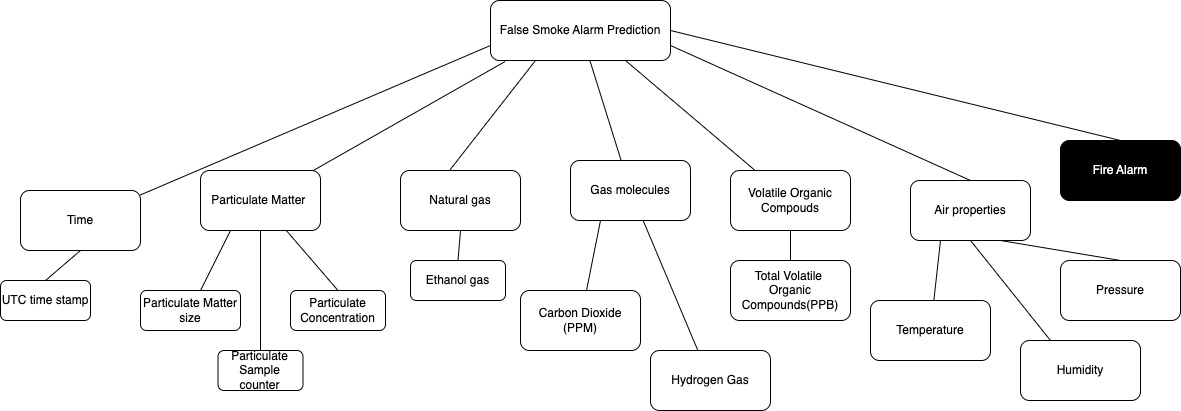

####**Task 1.4 Analytics Base Table(ABT)**

For each of the above domain concepts and sub-concepts that features that best describe the concept are summarized in the ABT table.

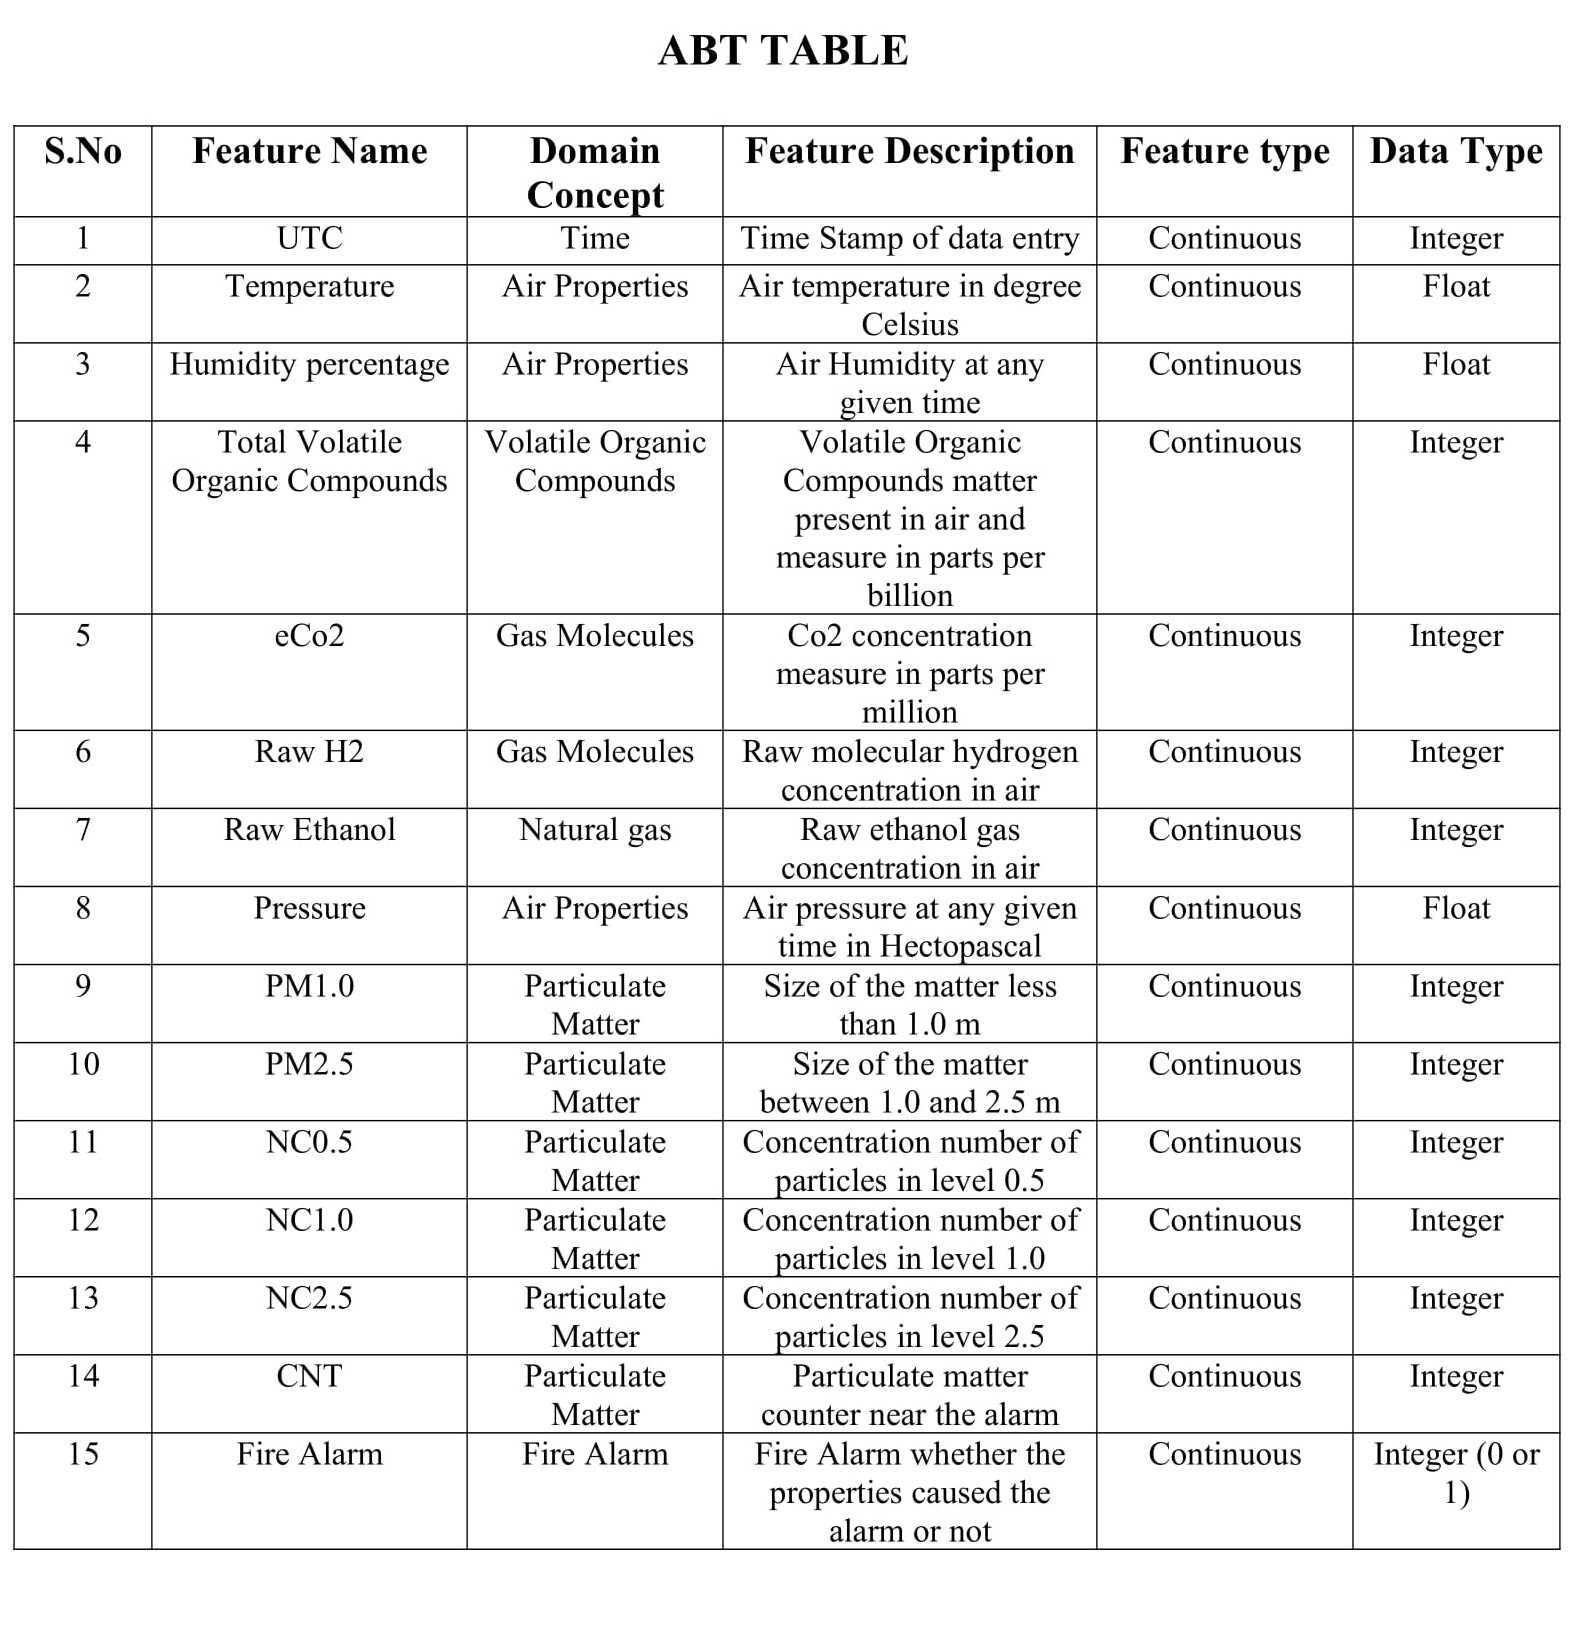

The features of each domain concepts:

* **Air Properties (Domain Concept Features):** information about air temperature, pressure, humidity
    * Temperature of air at any given time
    * Pressure and humidity contained in the air.

* **Organic compounds (Volatile Organice Compound Features):** information on different oragnic compunds present in the air
    * TVOC[PPB]

* **Gas Molecules:** information about different gas molecules present in the air.
    * eCo2
    * Raw H2

* **Natural Gas:** information about natural gas compounds present int the air
    * Raw Ethanol

* **Particulate Matter:** information about Particulate matter size and concentration present in the air.
    * PM1.0, PM2,5
    * NC0.5, NC1.0, NC2.5
    * Sample Counter

* **Time:** information about time stamp at which the data is recorded
    * UTC

###Task 2: **Data Exploration**

In [ ]:
import os
import re
import json
import warnings
import numpy as np
import pandas as pd
import urllib.request

import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from xgboost.sklearn import XGBClassifier

from mlxtend.evaluate import paired_ttest_5x2cv

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit,StratifiedKFold,cross_val_score,learning_curve

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#Reading the dataset
data_url = "https://raw.githubusercontent.com/Chanpreet-Singh/PoDS-Group-10/main/smoke_detection_iot.csv"
file_name = "data.csv"
if not os.path.exists(file_name):
  urllib.request.urlretrieve(data_url, file_name)

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0,0
1,1,1654733332,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,1,0
2,2,1654733333,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,2,0
3,3,1654733334,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,3,0
4,4,1654733335,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,4,0


**Data Description**<br>

The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.
1. **UTC**: Time Stamp of data entry(in UTC)
2. **Temperature**: Air Temperature in degree Celcius
3. **Humidity%**: Air Humidity
4. **TVOC[ppb]**: Total Volatile Organic Compounds, measured in parts per billion
5. **eCO2[ppm]**: co2 equivalent concentration; calculated from different values like TVCO, measured in parts per million
6. **Raw H2**: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
7. **Raw Ethanol**: raw ethanol gas
8. **Pressure[hPa]**: Air Pressure, in Hectopascal
9. **PM1.0**: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5), in micrograms per cubic meter of air (µg/m3)
10. **PM2.5**: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5), in micrograms per cubic meter of air (µg/m3)
11. **NC0.5**: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air
12. **NC1.0**: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air.
13. **NC2.5**: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air.
14. **CNT**: Sample counter.
15. **Fire Alarm**: "1" if a fire is there, 0 if not.

In [ ]:
data.drop(['Unnamed: 0', 'UTC', 'CNT'], axis=1, inplace=True)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0
1,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,0
2,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,0
3,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,0
4,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,0


- Dropped the unnamed column which is nothing but an index. 
- Dropped UTC because logically fire alarm is irrespective of the time. Thus, to save computations, the column is dropped before every other coputations.
- Dropped CNT column because it is just a counter and logically does not create an impact on the target variable.

####**Task 2.1 Data quality report**

#####**Tabular report for categorical features**<br>
As per the data description, all of the features are continuous. So there isn't any categorical features' report.

#####**Tabular report for continuous features**

Data Quality report for continuous features contains different values like Min, Max, Standard Deviation etc., and based on this data quality plan will be generated.

Continuous features report includes:
1. Min
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Max
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - num of distinct values for a feature

In [ ]:
data.describe(include=['number'])

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00
mean,15.97,48.54,1942.06,670.02,12942.45,19754.26,938.63,100.59,184.47,491.46,203.59,80.05,0.71
std,14.36,8.87,7811.59,1905.89,272.46,609.51,1.33,922.52,1976.31,4265.66,2214.74,1083.38,0.45
min,-22.01,10.74,0.00,400.00,10668.00,15317.00,930.85,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.99,47.53,130.00,400.00,12830.00,19435.00,938.70,1.28,1.34,8.82,1.38,0.03,0.00
50%,20.13,50.15,981.00,400.00,12924.00,19501.00,938.82,1.81,1.88,12.45,1.94,0.04,1.00
75%,25.41,53.24,1189.00,438.00,13109.00,20078.00,939.42,2.09,2.18,14.42,2.25,0.05,1.00
max,59.93,75.20,60000.00,60000.00,13803.00,21410.00,939.86,14333.69,45432.26,61482.03,51914.68,30026.44,1.00


In [ ]:
#Code for generating continuous features report
#The functional code is referenced from Lab Tutorial - 2

def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

**Below is the generated data quality report of the continuous features**

In [ ]:
build_continuous_features_report(data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Temperature[C],62630,0.00,21672,-22.01,10.99,15.97,20.13,25.41,59.93,14.36
Humidity[%],62630,0.00,3890,10.74,47.53,48.54,50.15,53.24,75.20,8.87
TVOC[ppb],62630,0.00,1966,0.00,130.00,1942.06,981.00,1189.00,60000.00,7811.59
eCO2[ppm],62630,0.00,1713,400.00,400.00,670.02,400.00,438.00,60000.00,1905.89
Raw H2,62630,0.00,1830,10668.00,12830.00,12942.45,12924.00,13109.00,13803.00,272.46
Raw Ethanol,62630,0.00,2659,15317.00,19435.00,19754.26,19501.00,20078.00,21410.00,609.51
Pressure[hPa],62630,0.00,2213,930.85,938.70,938.63,938.82,939.42,939.86,1.33
PM1.0,62630,0.00,1337,0.00,1.28,100.59,1.81,2.09,14333.69,922.52
PM2.5,62630,0.00,1351,0.00,1.34,184.47,1.88,2.18,45432.26,1976.31
NC0.5,62630,0.00,3093,0.00,8.82,491.46,12.45,14.42,61482.03,4265.66


####**Task 2.2 Data visualizations of values in each feature**

We can use visualizations for getting better insights in to the data.
* Continuous feature - Histogram
  * If cardinality < 10 use bar plots instead
* Categorical feature - Bar plot


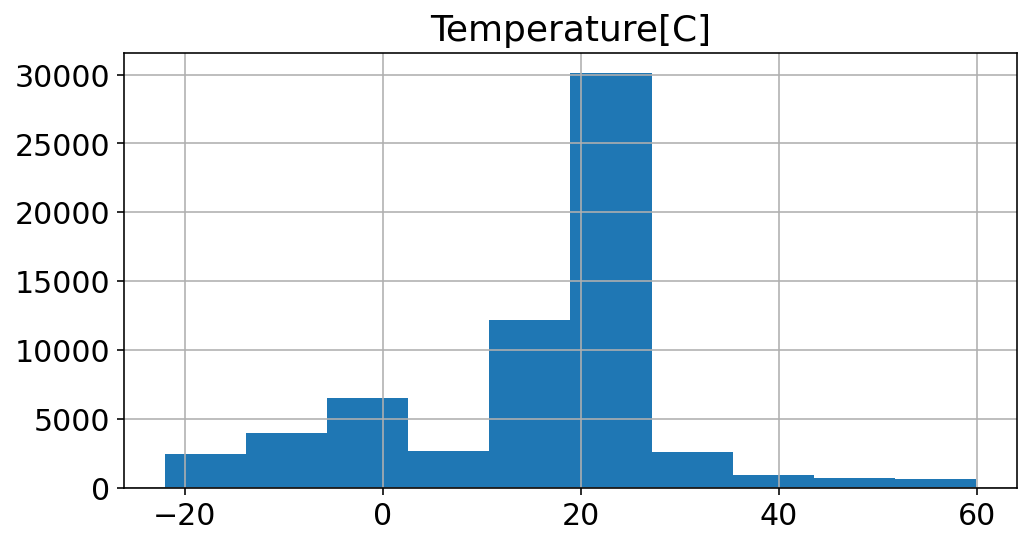

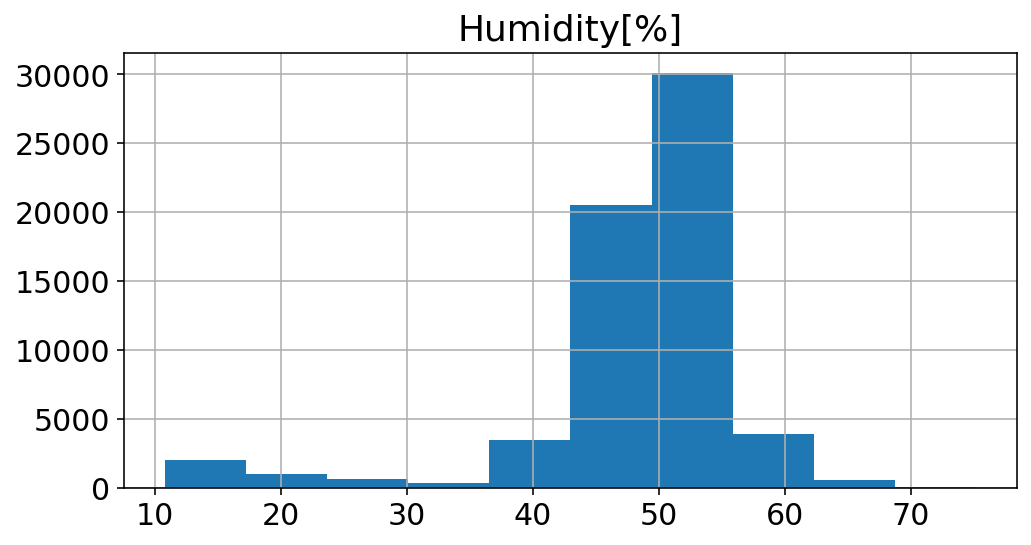

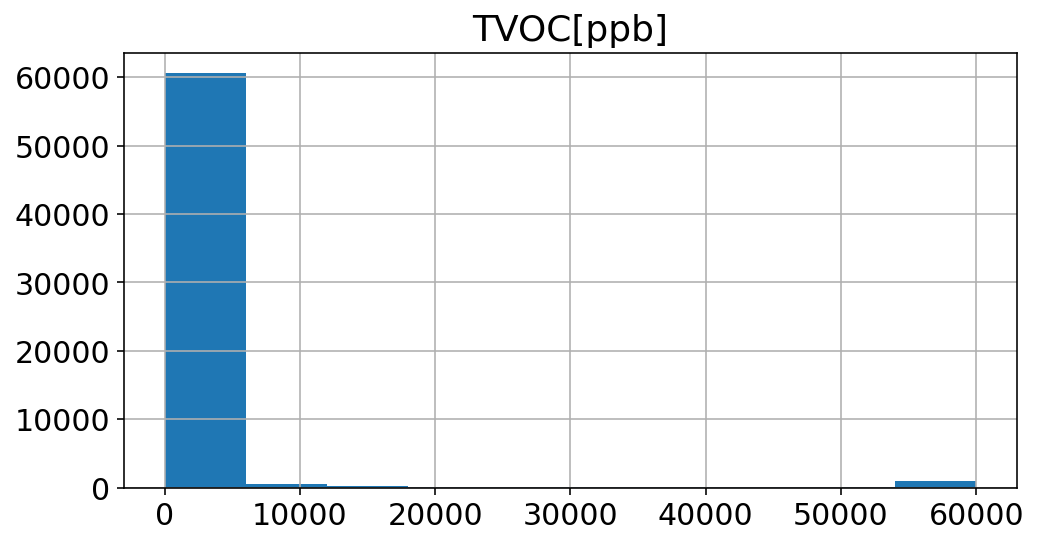

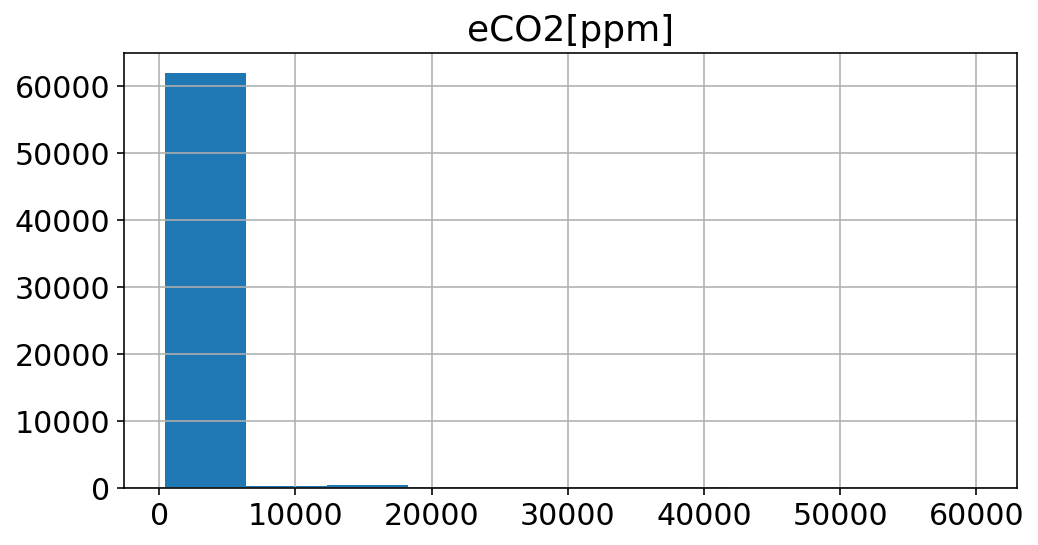

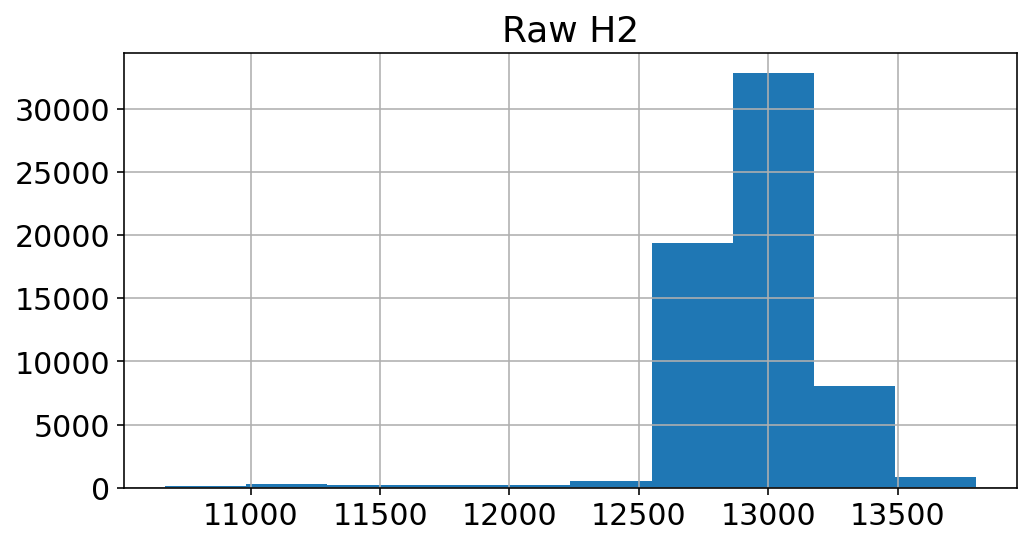

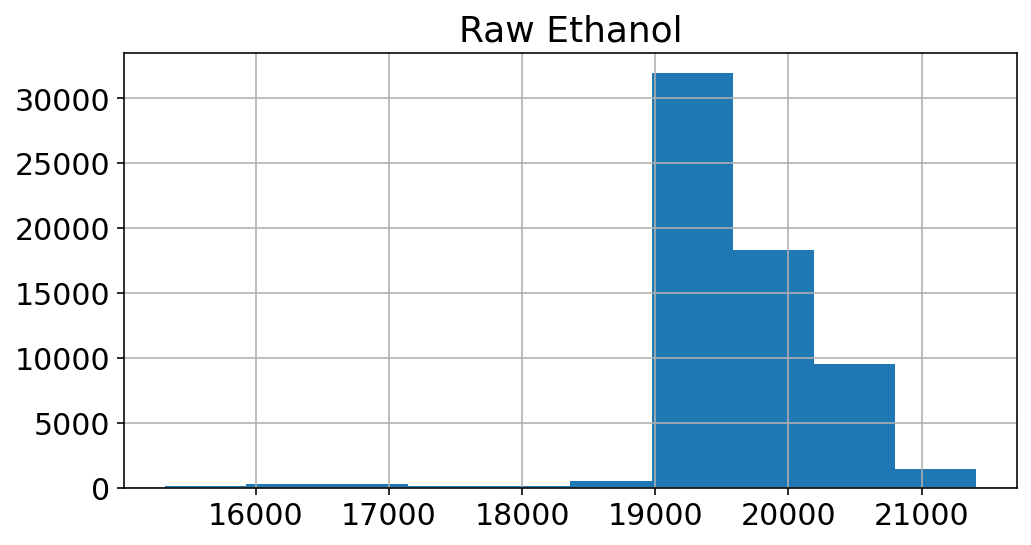

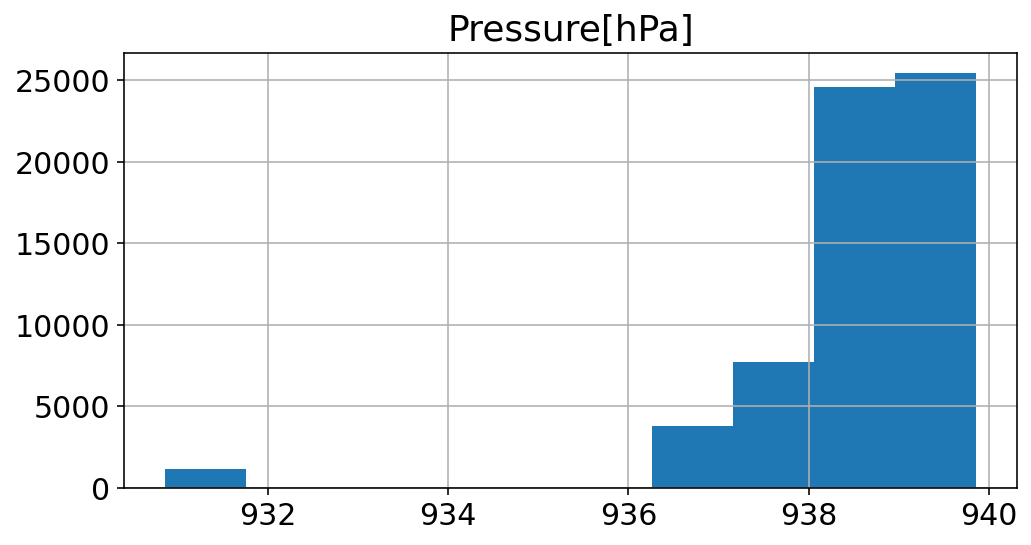

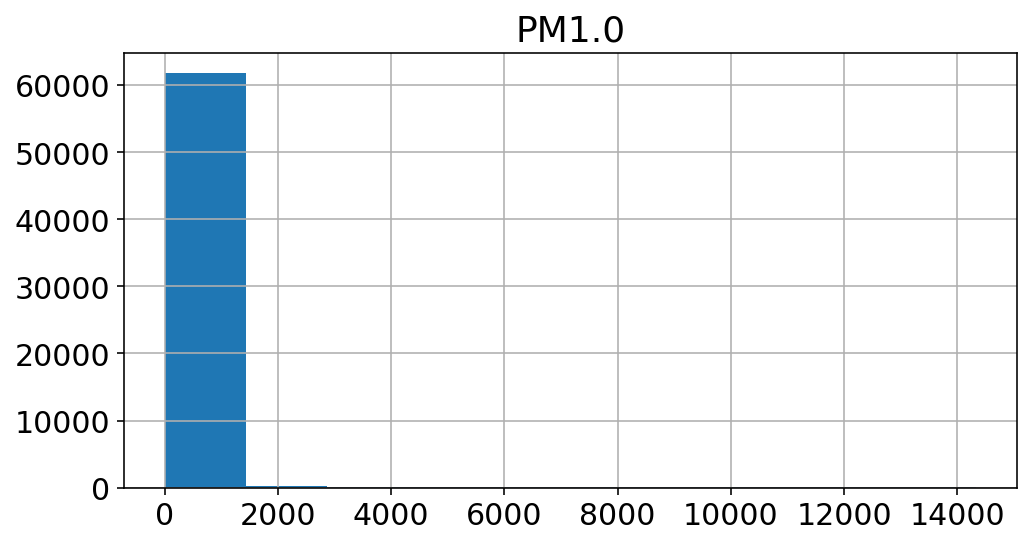

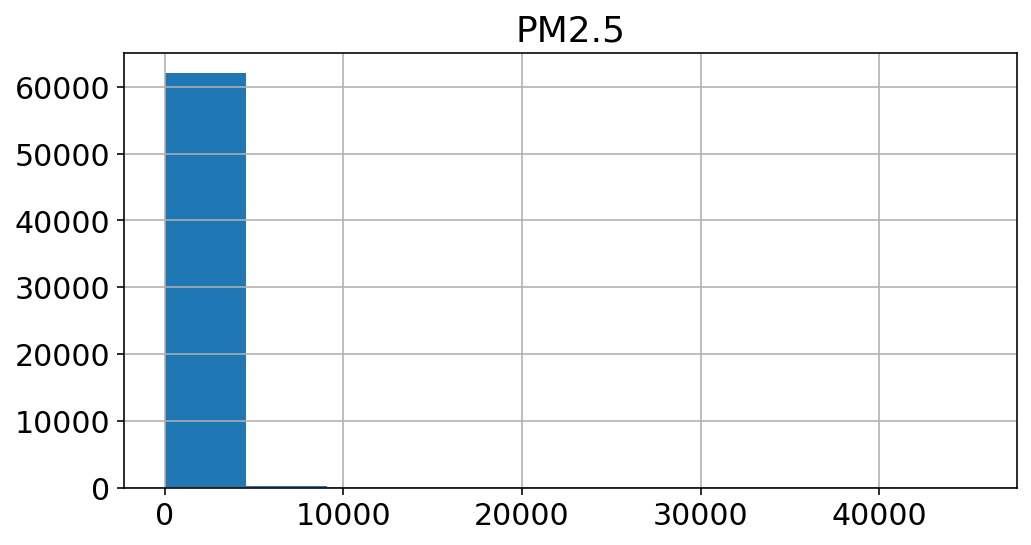

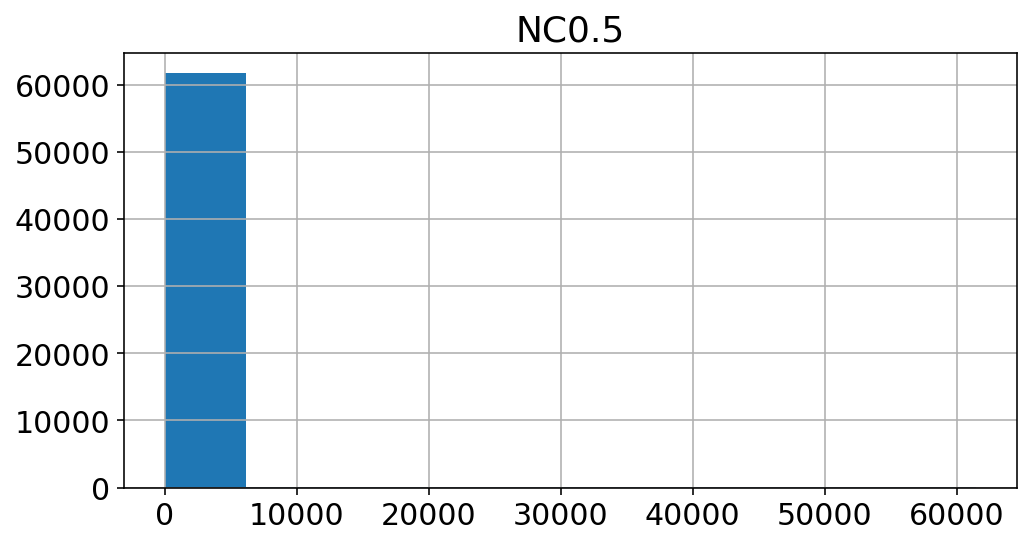

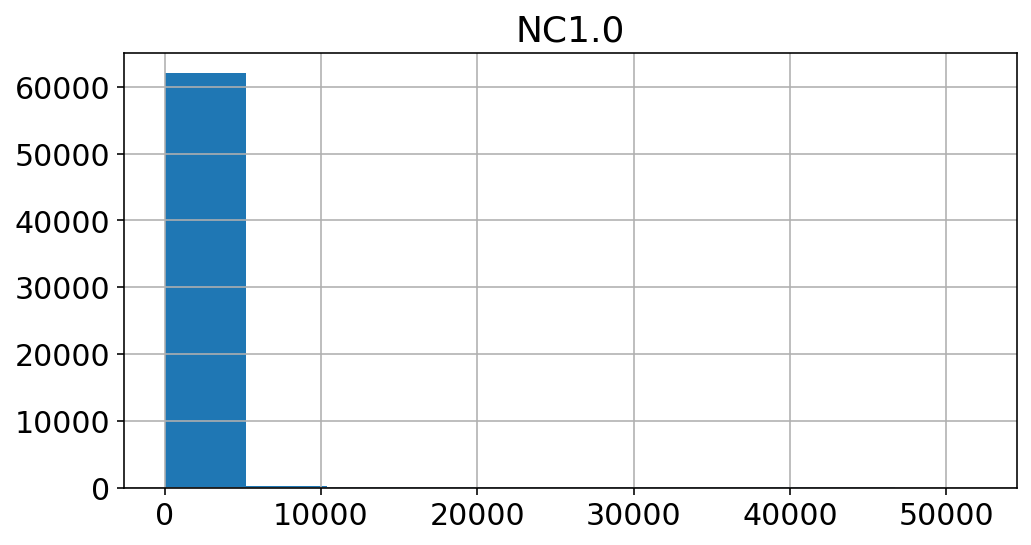

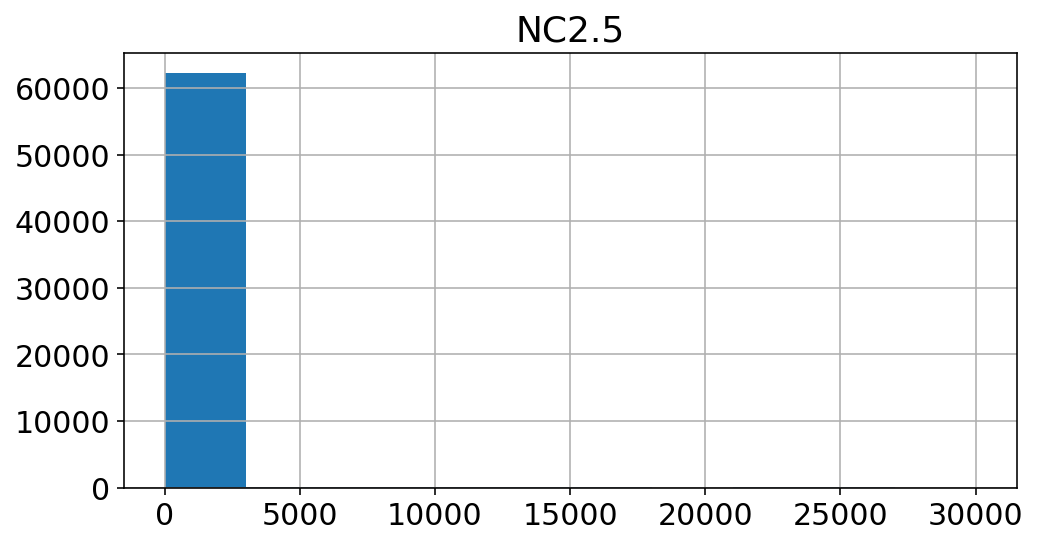

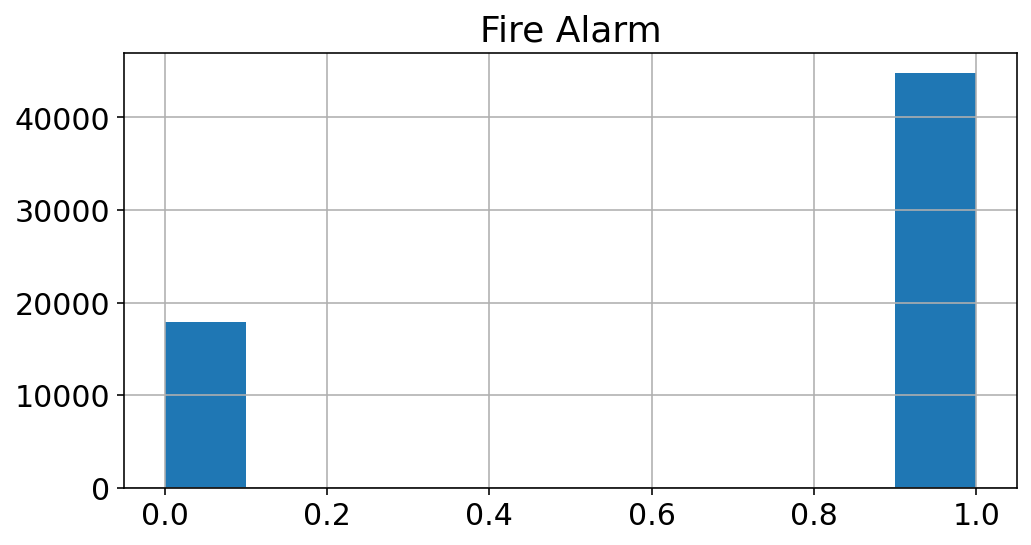

In [ ]:
# code for generating histograms
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["font.size"] = 15

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

for feature_name in data.columns:
  data.hist(column=[feature_name])

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

ax = data['Temperature[C]'].value_counts().sort_index(ascending=True)

#plotting graph
Sct = [go.Scatter(x = ax.index, y = ax.values, mode = 'lines', name = 'lines')]
layout = go.Layout(title = 'Temperature graph')
fig = go.Figure(data = Sct, layout = layout)
iplot(fig)

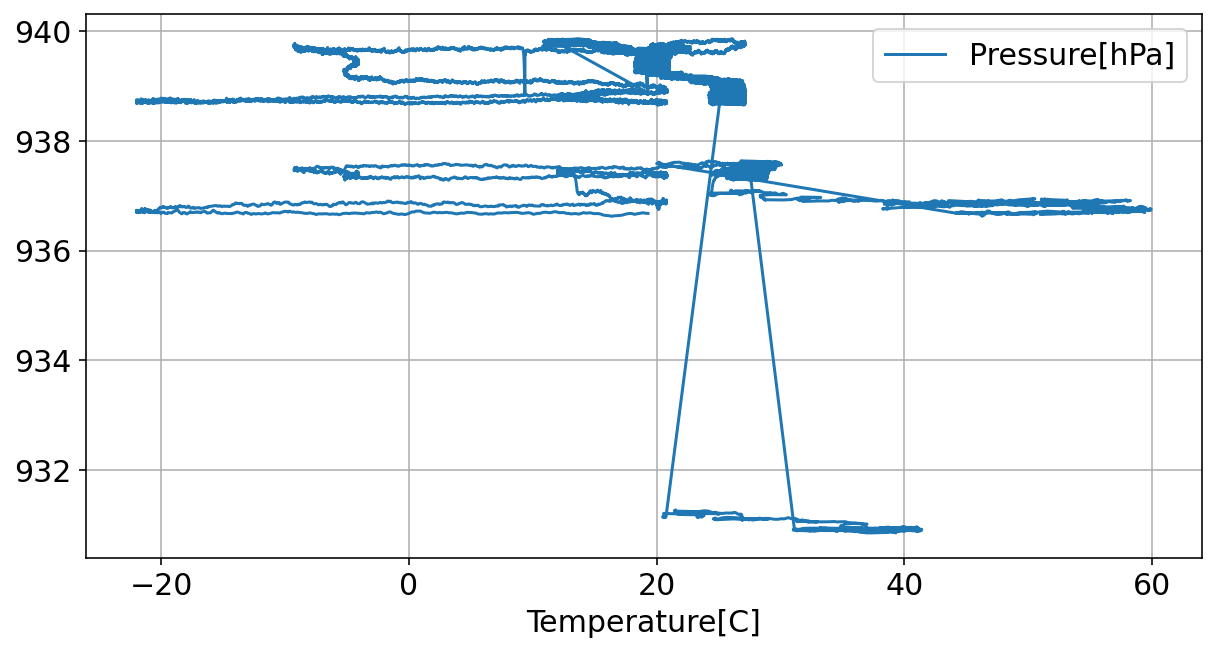

In [ ]:
data.plot(x='Temperature[C]', y=[ 'Pressure[hPa]'], figsize=(10,5), grid=True)
plt.show()

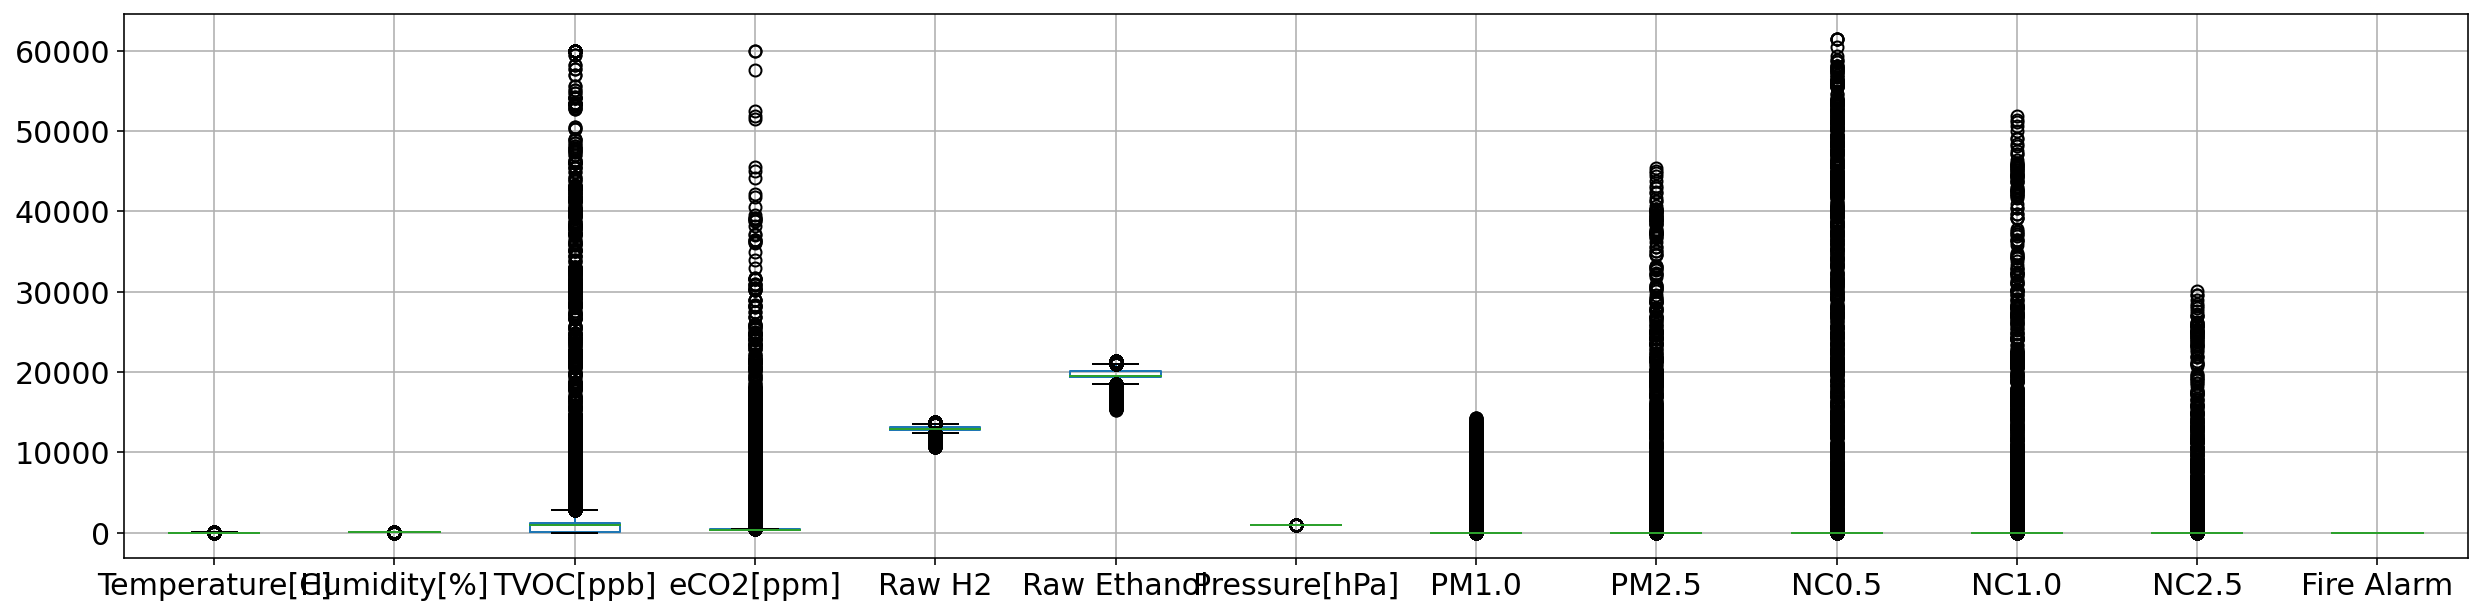

In [ ]:
data.boxplot(figsize=(21,5))
plt.show()

In [ ]:
features = list(data.columns)
features.remove("Fire Alarm")
features.sort()

####**Data quality issues**

The most common data quality issues are:
* **Missing values**
* **Irregular cardinality**
* **Outliers**
* **Class Imbalance**

####**Data Quality plan**

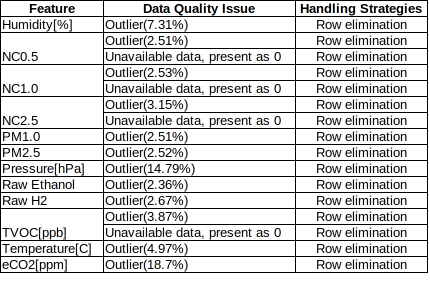

###**Task 3 Data Preparation**

#####**1. Missing values**

In [ ]:
#null values
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [ ]:
data.head(10)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0
1,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,0
2,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,0
3,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,0
4,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,0
5,20.07,54.12,0,400,12419,18998,939.73,0.00,0.00,0.00,0.00,0.00,0
6,20.09,53.61,0,400,12432,19058,939.74,0.00,0.00,0.00,0.00,0.00,0
7,20.10,53.20,0,400,12439,19114,939.76,0.00,0.00,0.00,0.00,0.00,0
8,20.12,52.81,0,400,12448,19155,939.76,0.00,0.00,0.00,0.00,0.00,0
9,20.13,52.46,0,400,12453,19195,939.76,0.90,3.78,0.00,4.37,2.78,0


Note: There are no null values, but there are a lot of data points with value as 0. We need to treat them separately.

In [ ]:
#iteraating every column
for each_col in features:
  x = data[data[each_col]==0]
  print("{0} - {1}".format(each_col, len(x)))

Humidity[%] - 0
NC0.5 - 182
NC1.0 - 80
NC2.5 - 88
PM1.0 - 140
PM2.5 - 118
Pressure[hPa] - 0
Raw Ethanol - 0
Raw H2 - 0
TVOC[ppb] - 2698
Temperature[C] - 1
eCO2[ppm] - 0


The columns,

* NC0.5 - 40 values
* PM1.0 - 34 values
* PM2.5 - 12 values
* TVOC[ppb] - 1386 values
* Temperature - 1 value

contain the value out of which 0 as a value is feasible only for temperature. Thus, we need to remove 0 from NC0.5, PM1.0, PM2.5, TVOC.


In [ ]:
#unique values in target
pd.Series(data['Fire Alarm'].unique())

0    0
1    1
dtype: int64

In [ ]:
#value counts in target
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

#####**2. Irregular Cardinality**<br>
Since all the features are continuous, we need to ensure, the features should have high cardinality

In [ ]:
data.nunique()

Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
Fire Alarm            2
dtype: int64

Since the features are physical data of a few particular areas. A short list of different scenarios which are captured:<br>
1. Normal indoor
2. Normal outdoor
3. Indoor wood fire, firefighter training area
4. Indoor gas fire, firefighter training area
5. Outdoor wood, coal, and gas grill
6. Outdoor high humidity

Under such different environments, the cardinality seems to be genuine.

#####**3. Outliers**<br>
For the detection of outliers, we will clamp the lower threshold by setting:<br>
- The lower threshold to the 1st quartile value minus 1.5 timesthe inter-quartile range
- The upper threshold to the 3rd quartile plus 1.5 times the inter-quartile range.

Q3 = 75th quantile<br>
Q1 = 25th quantile<br>
IQR = Q3 - Q1<br>
Lower threshold = Q1 - 1.5\*IQR<br>
Upper threshold = Q3 + 1.5\*IQR<br>
The outliers will be the data points whose<br>
* value\<lower threshold
* value\>uppoer threshold





In [ ]:
whisker_length_const = 1.75
outlier_info = {}
for each_col in features:
  Q1 = data[each_col].quantile(0.25)
  Q3 = data[each_col].quantile(0.75)
  IQR = Q3-Q1
  outlier_info[each_col] = {
                            "Q1": Q1,
                            "Q3": Q3,
                            "IQR": IQR,
                            "LB": Q1 - whisker_length_const*IQR,
                            "UB": Q3 + whisker_length_const*IQR
                          }
print(json.dumps(outlier_info, indent=2))

{
  "Humidity[%]": {
    "Q1": 47.53,
    "Q3": 53.24,
    "IQR": 5.710000000000001,
    "LB": 37.5375,
    "UB": 63.2325
  },
  "NC0.5": {
    "Q1": 8.82,
    "Q3": 14.42,
    "IQR": 5.6,
    "LB": -0.9799999999999986,
    "UB": 24.22
  },
  "NC1.0": {
    "Q1": 1.384,
    "Q3": 2.249,
    "IQR": 0.8650000000000002,
    "LB": -0.12975000000000048,
    "UB": 3.7627500000000005
  },
  "NC2.5": {
    "Q1": 0.033,
    "Q3": 0.051,
    "IQR": 0.017999999999999995,
    "LB": 0.0015000000000000083,
    "UB": 0.08249999999999999
  },
  "PM1.0": {
    "Q1": 1.28,
    "Q3": 2.09,
    "IQR": 0.8099999999999998,
    "LB": -0.13749999999999973,
    "UB": 3.5074999999999994
  },
  "PM2.5": {
    "Q1": 1.34,
    "Q3": 2.18,
    "IQR": 0.8400000000000001,
    "LB": -0.13000000000000012,
    "UB": 3.6500000000000004
  },
  "Pressure[hPa]": {
    "Q1": 938.7,
    "Q3": 939.418,
    "IQR": 0.7179999999999609,
    "LB": 937.4435000000001,
    "UB": 940.6745
  },
  "Raw Ethanol": {
    "Q1": 19435.0,
    

Finding the number of outliers in each column:-

In [ ]:
total = len(data)
for each_col in features:
  filtered_data_lb = data[data[each_col]<outlier_info[each_col]["LB"]]
  filtered_data_ub = data[data[each_col]>outlier_info[each_col]["UB"]]
  print("{0} -> {1}/{2} = {3}%".format(each_col, len(filtered_data_lb)+len(filtered_data_ub), total, (len(filtered_data_lb)+len(filtered_data_ub))*100/total))

Humidity[%] -> 4579/62630 = 7.31119271914418%
NC0.5 -> 1574/62630 = 2.513172600989941%
NC1.0 -> 1586/62630 = 2.5323327478844004%
NC2.5 -> 1977/62630 = 3.156634200862207%
PM1.0 -> 1576/62630 = 2.516365958805684%
PM2.5 -> 1582/62630 = 2.525946032252914%
Pressure[hPa] -> 9266/62630 = 14.794826760338497%
Raw Ethanol -> 1483/62630 = 2.367874820373623%
Raw H2 -> 1674/62630 = 2.672840491777104%
TVOC[ppb] -> 2397/62630 = 3.8272393421682898%
Temperature[C] -> 3113/62630 = 4.9704614402043745%
eCO2[ppm] -> 11712/62630 = 18.700303368992497%


Handling of zeros

In [ ]:
zero_handling_features = ["NC0.5", "PM1.0", "PM2.5", "TVOC[ppb]"]
print("Before zero handling, data count - {0}".format(len(data)))
for each_col in zero_handling_features:
  data = data[data[each_col]!=0]
print("After zero handling, data count - {0}".format(len(data)))

Before zero handling, data count - 62630
After zero handling, data count - 59808


In [ ]:
data.shape


(59808, 13)

In [ ]:
print(data['Fire Alarm'].value_counts())

1    44097
0    15711
Name: Fire Alarm, dtype: int64


Perform oversampling.

In [ ]:
# Separate dataset by classes
class1 = data[data['Fire Alarm']==1]
class2 = data[data['Fire Alarm']==0]
print(data['Fire Alarm'].value_counts())
# # Sample class 2 with the size similar to the class 1
class2 = class2.sample(n=len(class1), random_state=42, replace=True)

# # Concatenate oversampled datasets
dfs = [class1,class2]
data = pd.concat(dfs)
print(data['Fire Alarm'].value_counts())

1    44097
0    15711
Name: Fire Alarm, dtype: int64
1    44097
0    44097
Name: Fire Alarm, dtype: int64


In [ ]:
data.shape

(88194, 13)

###**Task 4: Data Modelling**

**Data** Splitting into feature and target

In [ ]:
# Separate features and target
X = data.copy()
X.drop('Fire Alarm',axis = 1,inplace = True)
y = data['Fire Alarm']

####**Task 4.1 Feature Selection**

In [ ]:
#Using sklearn RFE
scaler = StandardScaler()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=1)
X_std = scaler.fit_transform(X)
rfe.fit(X_std, y)

print(dict(zip(X.columns, rfe.ranking_)))

print(X.columns[rfe.support_])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
{'Temperature[C]': 1, 'Humidity[%]': 1, 'TVOC[ppb]': 1, 'eCO2[ppm]': 3, 'Raw H2': 1, 'Raw Ethanol': 1, 'Pressure[hPa]': 1, 'PM1.0': 1, 'PM2.5': 1, 'NC0.5': 1, 'NC1.0': 1, 'NC2.5': 2}
Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Raw H2', 'Raw Ethanol',
       'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0'],
      dtype='object')


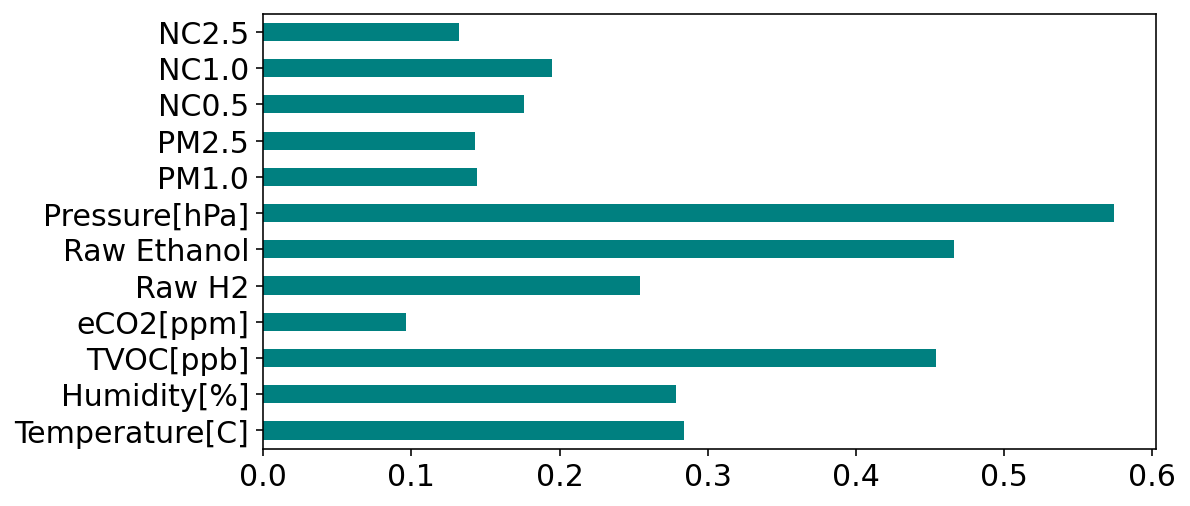

In [ ]:
#Using mutual info classification
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')

In [ ]:
#Dropping the less important feature
X = X.drop(columns=['eCO2[ppm]'])

###**Task 3: Modeling**

In [ ]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
3178,9.38,56.86,11,400,13347,20160,939.58,1.78,1.85,12.25,1.91,0.04,1
3223,8.82,63.69,10,400,13278,20214,939.70,2.48,2.57,17.05,2.66,0.06,1
3224,8.81,63.99,11,400,13275,20212,939.71,2.44,2.54,16.83,2.62,0.06,1
3225,8.79,64.29,14,400,13276,20206,939.71,2.43,2.52,16.72,2.61,0.06,1
3226,8.78,64.52,9,400,13279,20209,939.70,2.43,2.52,16.71,2.61,0.06,1


In [ ]:
#spliting the dattaset into train test as well as x and y by sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Remove the special characters in column labels that cause issue for XGBoost algorithm.

In [ ]:
#regex for coloumn lables 
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#applied for all the data
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((61735, 11), (61735,), (26459, 11), (26459,))

In [ ]:
y_train.value_counts(normalize=True)

0   0.50
1   0.50
Name: Fire Alarm, dtype: float64

####**Task 4.2 Model Building**

In [ ]:
#Defining all the classifier models we are going to use
classifiers = [GradientBoostingClassifier(), RandomForestClassifier(),DecisionTreeClassifier(), AdaBoostClassifier()]
train_sizes = [1, 1000, 5000, 10000, 50000, 100000]

###Logistic Regression

In [ ]:
#defining the parameters by grid search CV and getting the best parameters
tuned_parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model=GridSearchCV(LogisticRegression(), tuned_parameters, cv=10)
model.fit(X_train,y_train)
print("tuned hyperparameters for logistic regression:",model.best_params_)
print("accuracy :",model.best_score_)
 
#fitting the model and getting results
lr_model=LogisticRegression(C=model.best_params_["C"],penalty=model.best_params_["penalty"])
lr_model.fit(X_train,y_train)
y_predict_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_predict_lr, target_names=["Fire Alarm", "No Fire Alarm"]))
print(confusion_matrix(y_test, y_predict_lr))

tuned hyperparameters for logistic regression: {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8891389144581948
               precision    recall  f1-score   support

   Fire Alarm       0.89      0.89      0.89     13201
No Fire Alarm       0.89      0.89      0.89     13258

     accuracy                           0.89     26459
    macro avg       0.89      0.89      0.89     26459
 weighted avg       0.89      0.89      0.89     26459

[[11692  1509]
 [ 1427 11831]]


Text(0.5, 1.0, ' Logistic Regression Confusion Matrix')

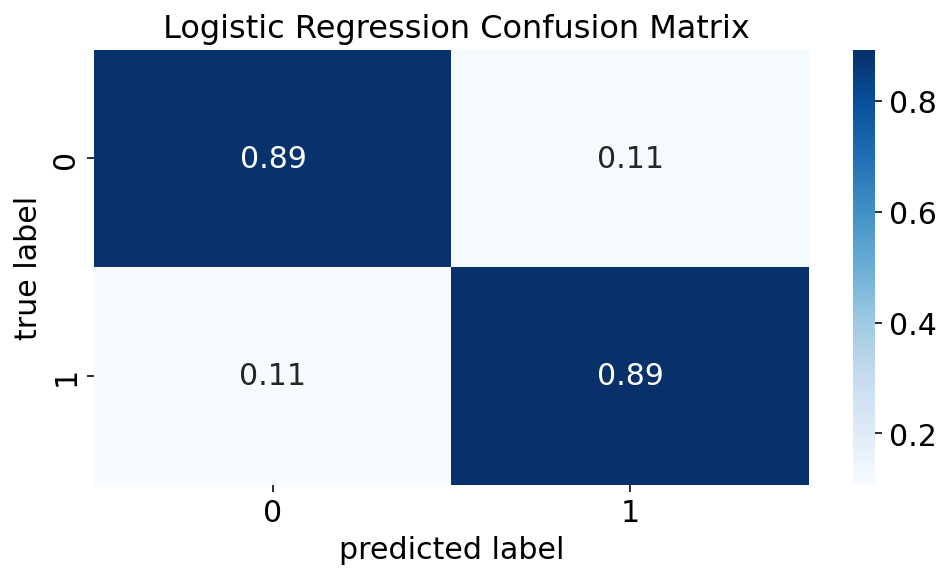

In [ ]:
#getting confusion matrix
cm = confusion_matrix(y_test, y_predict_lr)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_plot = sns.heatmap(cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" Logistic Regression Confusion Matrix", fontsize = 16)

###Gradient Boosting Classifier

In [ ]:
#defining the parameters by grid search CV and getting the best parameters
gradient_boost_parameters = {'n_estimators':range(20,81,10)}
gradient_boost_model=GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = gradient_boost_parameters, scoring='roc_auc',n_jobs=4, cv=5)
gradient_boost_model.fit(X_train,y_train)
print("tuned hyperparameters for logistic regression:",gradient_boost_model.best_params_)
print("accuracy :",gradient_boost_model.best_score_)
 
#fitting the model and getting results
gb_model=GradientBoostingClassifier()
X_train_std = scaler.fit_transform(X_train)
gb_model.fit(X_train_std,y_train)
X_test_std = scaler.fit_transform(X_test)
y_predict_gb = gb_model.predict(X_test_std)
print(classification_report(y_test, y_predict_gb, target_names=["Fire Alarm", "No Fire Alarm"]))
print(confusion_matrix(y_test, y_predict_gb))

tuned hyperparameters for logistic regression: {'n_estimators': 80}
accuracy : 0.9999994175073976
               precision    recall  f1-score   support

   Fire Alarm       0.88      1.00      0.94     13201
No Fire Alarm       1.00      0.87      0.93     13258

     accuracy                           0.93     26459
    macro avg       0.94      0.93      0.93     26459
 weighted avg       0.94      0.93      0.93     26459

[[13201     0]
 [ 1772 11486]]


Text(0.5, 1.0, ' Gradient Boosting Confusion Matrix')

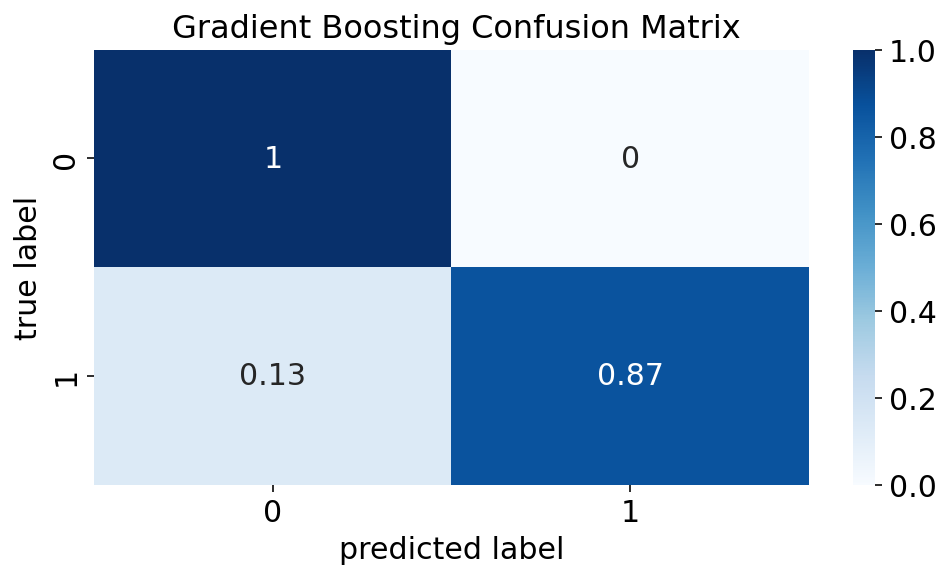

In [ ]:
#getting confusion matrix
cm = confusion_matrix(y_test, y_predict_gb)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_plot = sns.heatmap(cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" Gradient Boosting Confusion Matrix", fontsize = 16)

###Random Forest Classifier

Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best Estimator:
-----------------
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 70, 'min_samples_split': 75, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Classification Report:
-----------------
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     13201
           1       1.00      0.93      0.96     13258

    accuracy                           0.96     26459
   macro avg       0.97      0.96      0.96     26459
weighted avg       0.97      0.96      0.96     26459



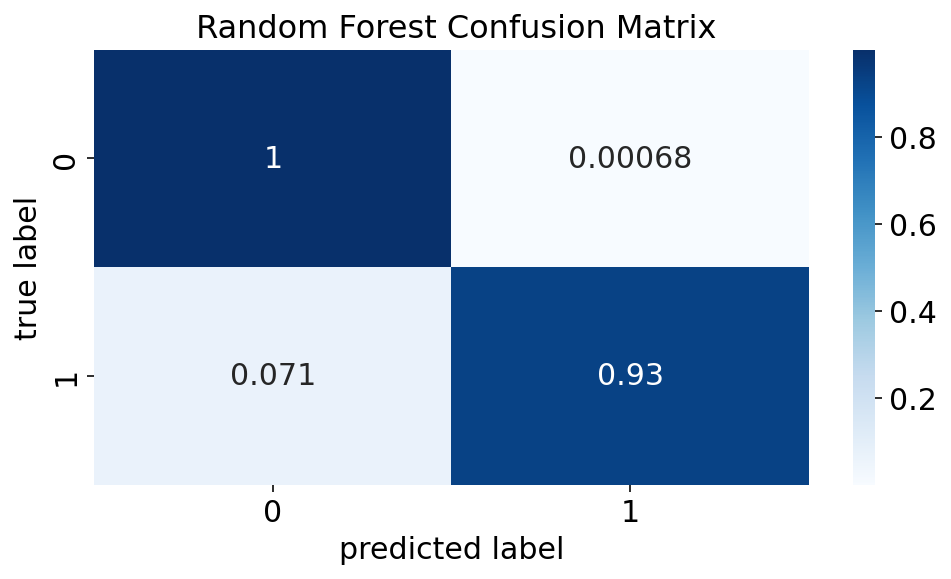

In [ ]:
param2 = {
    'max_depth':[5,6],
    'n_estimators':[5,10],
    'max_features':[3,5,10],
    'min_samples_leaf':[65,70,75,80],
    'min_samples_split':[65,70,75,80]
}

grid2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param2, verbose = 1, cv=3, n_jobs=-1)

grid2.fit(X_train, y_train)
print("\nBest Estimator:\n-----------------\n",grid2.best_estimator_.get_params())

# Using best estimator for modeling 
rf = grid2.best_estimator_
X_train_std = scaler.fit_transform(X_train)
rf.fit(X_train_std, y_train)
X_test_std = scaler.fit_transform(X_test)
y_pred_rf = rf.predict(X_test_std)

# Creating classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n-----------------\n",report)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = []
cm_plot = sns.heatmap(cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" Random Forest Confusion Matrix", fontsize = 16)
plt.savefig('conf-for.pdf', bbox_inches='tight')

###Decision Tree Classifier


Classification Report:
-----------------
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     13201
           1       1.00      0.84      0.92     13258

    accuracy                           0.92     26459
   macro avg       0.93      0.92      0.92     26459
weighted avg       0.93      0.92      0.92     26459



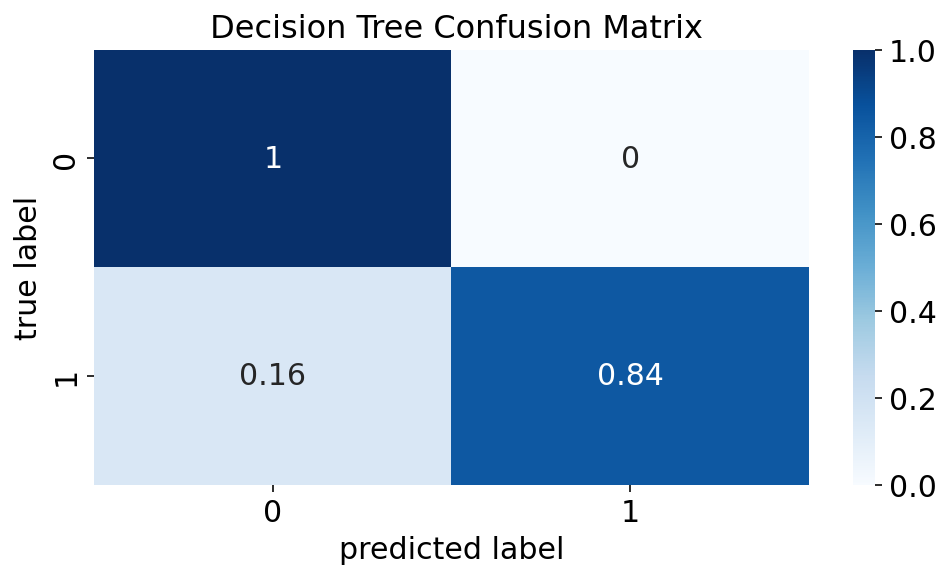

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
X_train_std = scaler.fit_transform(X_train)
tree.fit(X_train_std, y_train)
X_test_std = scaler.fit_transform(X_test)
y_pred_dt = tree.predict(X_test_std)

report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n-----------------\n",report)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = []
cm_plot = sns.heatmap(cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" Decision Tree Confusion Matrix", fontsize = 16)
plt.savefig('conf-for.pdf', bbox_inches='tight')

###XGBoost Model

In [ ]:
xgbmodel = XGBClassifier(objective = 'binary:hinge', n_estimators = 10)
xgbmodel_evaluation_set = [(X_test_std, y_test)]
xgbmodel.fit(X_train_std, y_train, eval_metric="error", eval_set=xgbmodel_evaluation_set, verbose=True)

[0]	validation_0-error:0.498923
[1]	validation_0-error:0.498923
[2]	validation_0-error:0.498923
[3]	validation_0-error:0.498923
[4]	validation_0-error:0.498923
[5]	validation_0-error:0.072112
[6]	validation_0-error:0.072112
[7]	validation_0-error:0.071696
[8]	validation_0-error:0.071847
[9]	validation_0-error:0.071771


XGBClassifier(n_estimators=10, objective='binary:hinge')

In [ ]:
xgbmodel.score(X_test_std, y_test)

0.9282285800672739

In [ ]:
y_xgb_pred = xgbmodel.predict(X_test_std)

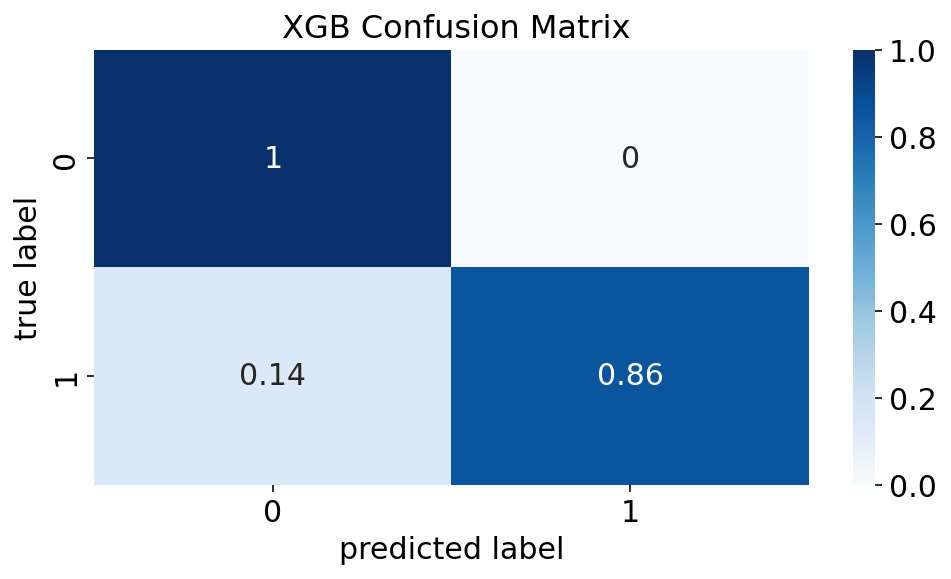

In [ ]:
#getting confusion matrix
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
xgb_cm = xgb_cm.astype('float') / xgb_cm.sum(axis=1)[:, np.newaxis]
classes = []
cm_plot = sns.heatmap(xgb_cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" XGB Confusion Matrix", fontsize = 16)
plt.savefig('conf-for.pdf', bbox_inches='tight')

####**Task 4.3 Hyperparameter tuning**

In [ ]:
#Hyperparameter tuning for n_estimators and max_depth 
gridxgb = GridSearchCV(estimator = xgbmodel, 
                    param_grid = {'n_estimators' : [25, 50, 100], 'max_depth': [2, 3, 4, 5]}, 
                    scoring = 'accuracy', 
                    cv = 5, 
                    n_jobs = -1)

xgbmodel_grid = gridxgb.fit(X_train, y_train)
print('Best parameters for XGB model: ', xgbmodel_grid.best_params_)

Best parameters for XGB model:  {'max_depth': 2, 'n_estimators': 100}


In [ ]:
tunedxgbmodel = XGBClassifier(objective = 'binary:hinge', 
                     n_estimators = xgbmodel_grid.best_params_['n_estimators'],
                     max_depth = xgbmodel_grid.best_params_['max_depth'])

In [ ]:
tunedxgbmodel.fit(X_train_std, y_train, eval_metric="error", eval_set=xgbmodel_evaluation_set, verbose=True)

[0]	validation_0-error:0.498923
[1]	validation_0-error:0.498923
[2]	validation_0-error:0.498923
[3]	validation_0-error:0.498923
[4]	validation_0-error:0.498923
[5]	validation_0-error:0.162213
[6]	validation_0-error:0.162213
[7]	validation_0-error:0.162213
[8]	validation_0-error:0.091916
[9]	validation_0-error:0.072112
[10]	validation_0-error:0.072112
[11]	validation_0-error:0.072112
[12]	validation_0-error:0.072112
[13]	validation_0-error:0.072112
[14]	validation_0-error:0.072112
[15]	validation_0-error:0.072112
[16]	validation_0-error:0.072112
[17]	validation_0-error:0.072112
[18]	validation_0-error:0.072112
[19]	validation_0-error:0.072112
[20]	validation_0-error:0.072112
[21]	validation_0-error:0.072112
[22]	validation_0-error:0.072112
[23]	validation_0-error:0.072112
[24]	validation_0-error:0.072112
[25]	validation_0-error:0.072112
[26]	validation_0-error:0.072112
[27]	validation_0-error:0.072112
[28]	validation_0-error:0.072112
[29]	validation_0-error:0.072074
[30]	validation_0-er

XGBClassifier(max_depth=2, objective='binary:hinge')

In [ ]:
#tuned xgb score
tunedxgbmodel.score(X_test_std, y_test)

0.9509807626894441

In [ ]:
y_xgb_pred = tunedxgbmodel.predict(X_test_std)

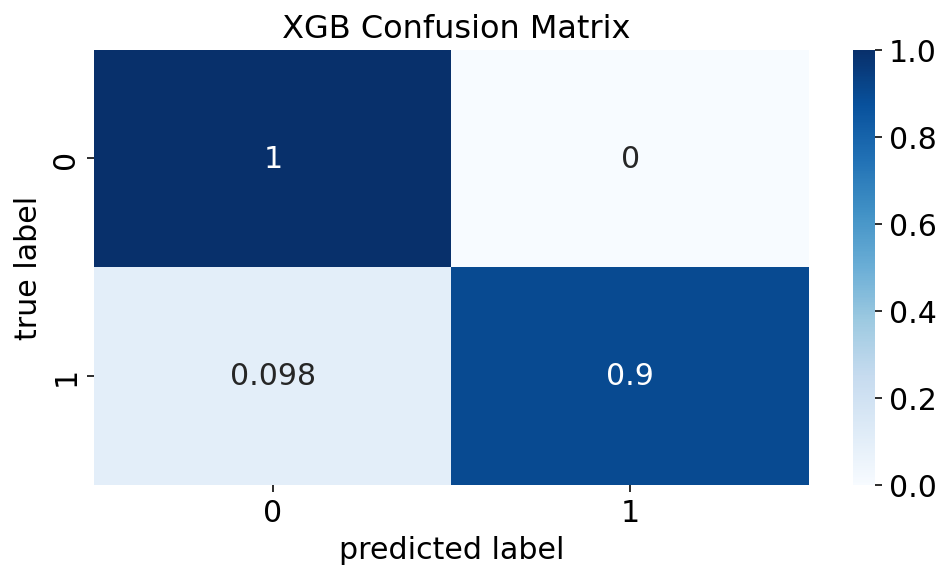

In [ ]:
#getting confusion matrix
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
xgb_cm = xgb_cm.astype('float') / xgb_cm.sum(axis=1)[:, np.newaxis]
classes = []
cm_plot = sns.heatmap(xgb_cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" XGB Confusion Matrix", fontsize = 16)
plt.savefig('conf-for.pdf', bbox_inches='tight')

In [ ]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13201
           1       1.00      0.90      0.95     13258

    accuracy                           0.95     26459
   macro avg       0.96      0.95      0.95     26459
weighted avg       0.96      0.95      0.95     26459



Using Randomized search CV for hyperparameter tuning in the random forest classifier

In [ ]:
#randomizedCV hyperparameter tuning for n estimators, max depth and min sample split
random_grid = {'n_estimators': [200, 300, 400, 500, 600],
'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
'min_samples_split': [2, 5, 10],
}
#providing max depths
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
random_grid["max_depth"] = max_depth
#using randomized cv
rf_op_model = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_op_model.fit(X_train_std, y_train)
#tuning the model
rf_model = RandomForestClassifier(n_estimators=rf_op_model.best_params_["n_estimators"],
min_samples_split=rf_op_model.best_params_["min_samples_split"],
max_depth=rf_op_model.best_params_["max_depth"],
)
#fitting with the best parameters and getting results
rf_model.fit(X_train_std, y_train)
y_predict_rf_tuned = rf_model.predict(X_test_std)
print(classification_report(y_test, y_predict_rf_tuned, target_names=["0", "1"]))
print(confusion_matrix(y_test, y_predict_rf_tuned))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13201
           1       1.00      0.94      0.97     13258

    accuracy                           0.97     26459
   macro avg       0.97      0.97      0.97     26459
weighted avg       0.97      0.97      0.97     26459

[[13201     0]
 [  786 12472]]


Text(0.5, 1.0, ' Random Forest Confusion Matrix')

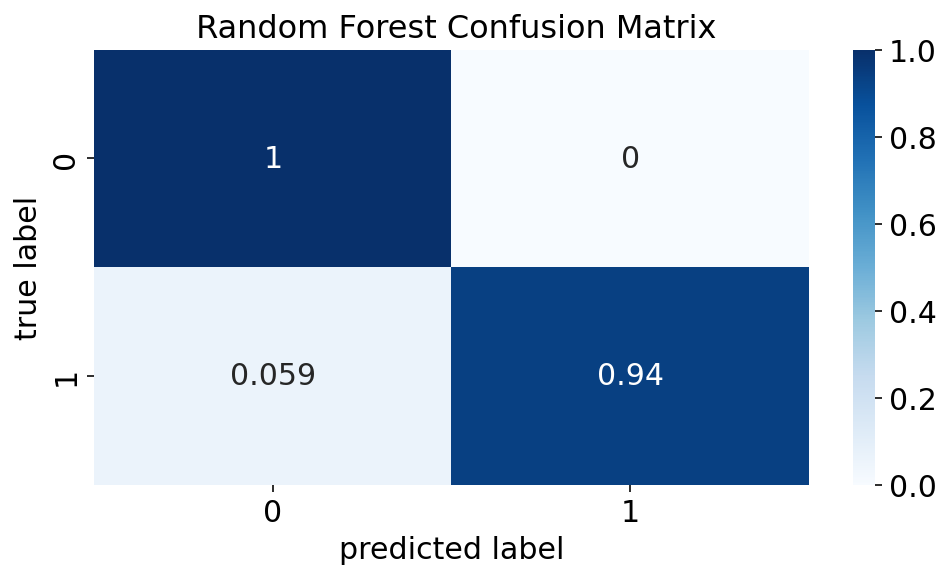

In [ ]:
#getting confusion matrix
cm = confusion_matrix(y_test, y_predict_rf_tuned)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_plot = sns.heatmap(cm, cmap="Blues", annot=True, cbar=True)
cm_plot.set(xlabel="predicted label", ylabel="true label");
plt.title(" Random Forest Confusion Matrix", fontsize = 16)

####**Task 4.4 Plot Learning Curves**

In [ ]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c, model):
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    lr = model
    
    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 10 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
        
    lr.fit(X,y) # Fitting the model
    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

In [ ]:
# Create learning curve using our function
def plot_learning_curvee(model):
  lc = learn_curve(X_train,y_train,1,model)
  print(f'\
  Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
  Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
  Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
  #  Plotting the curve
  title = 'Learning curves for a ' + str(model).split('(')[0] + ' model'
  plt.figure(figsize=(8,8)) 
  p = sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
  plt.title(title,fontsize=18)
  plt.ylabel("Misclassification Rate/Loss",fontsize=16)
  plt.xlabel("Size of training data",fontsize=16)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

  Mean Cross Validation Accuracy:
-------------------------
0.8853648192902087

  Standard Deviation of Cross Validation Accuracy:
-------------------------
0.005095385856750773

  Training Accuracy:
---------------
0.888993277719284




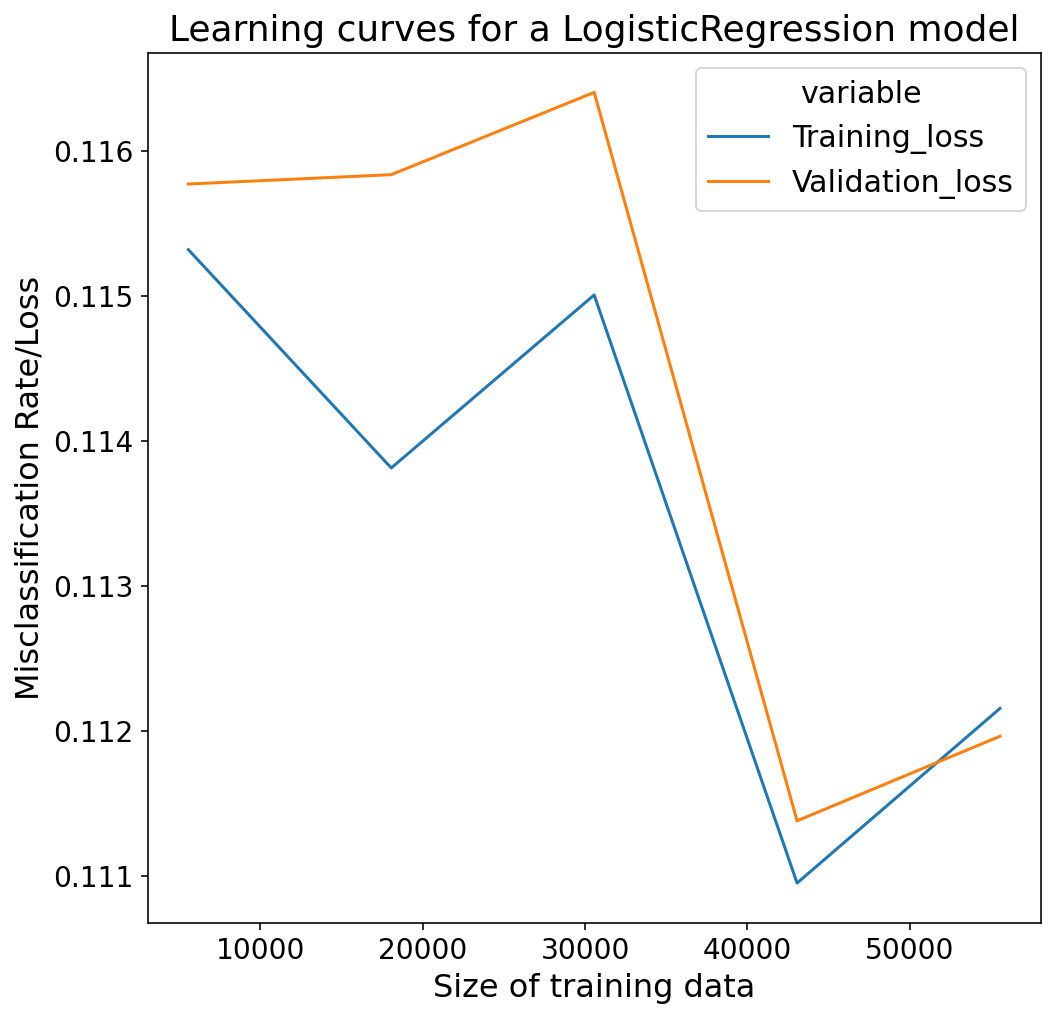

In [ ]:
plot_learning_curvee(lr_model)

  Mean Cross Validation Accuracy:
-------------------------
0.9997894264661656

  Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00016278391119999922

  Training Accuracy:
---------------
0.9999190086660728




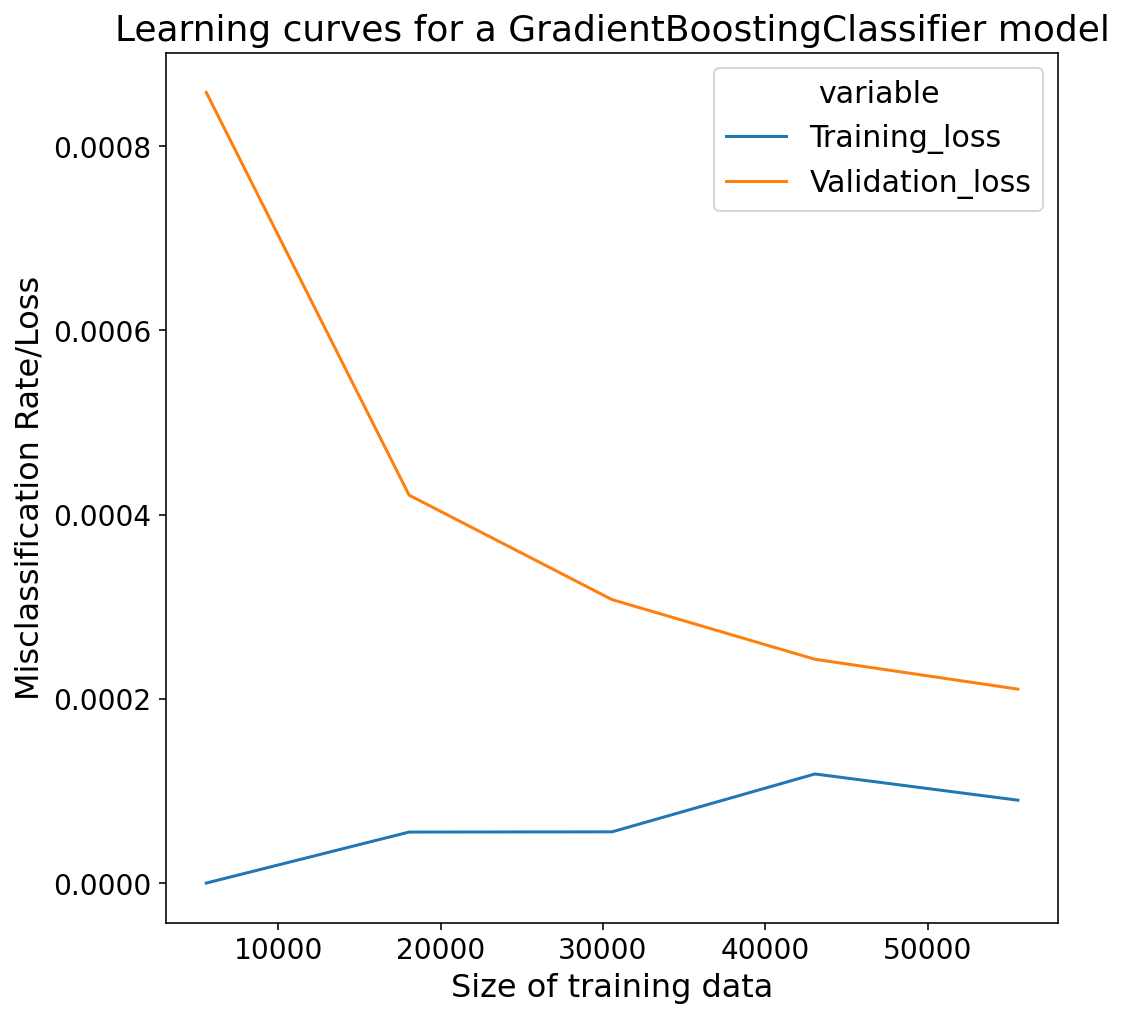

In [ ]:
plot_learning_curvee(gb_model)

  Mean Cross Validation Accuracy:
-------------------------
0.9988499217387694

  Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00045498700543982666

  Training Accuracy:
---------------
0.9989795091925164




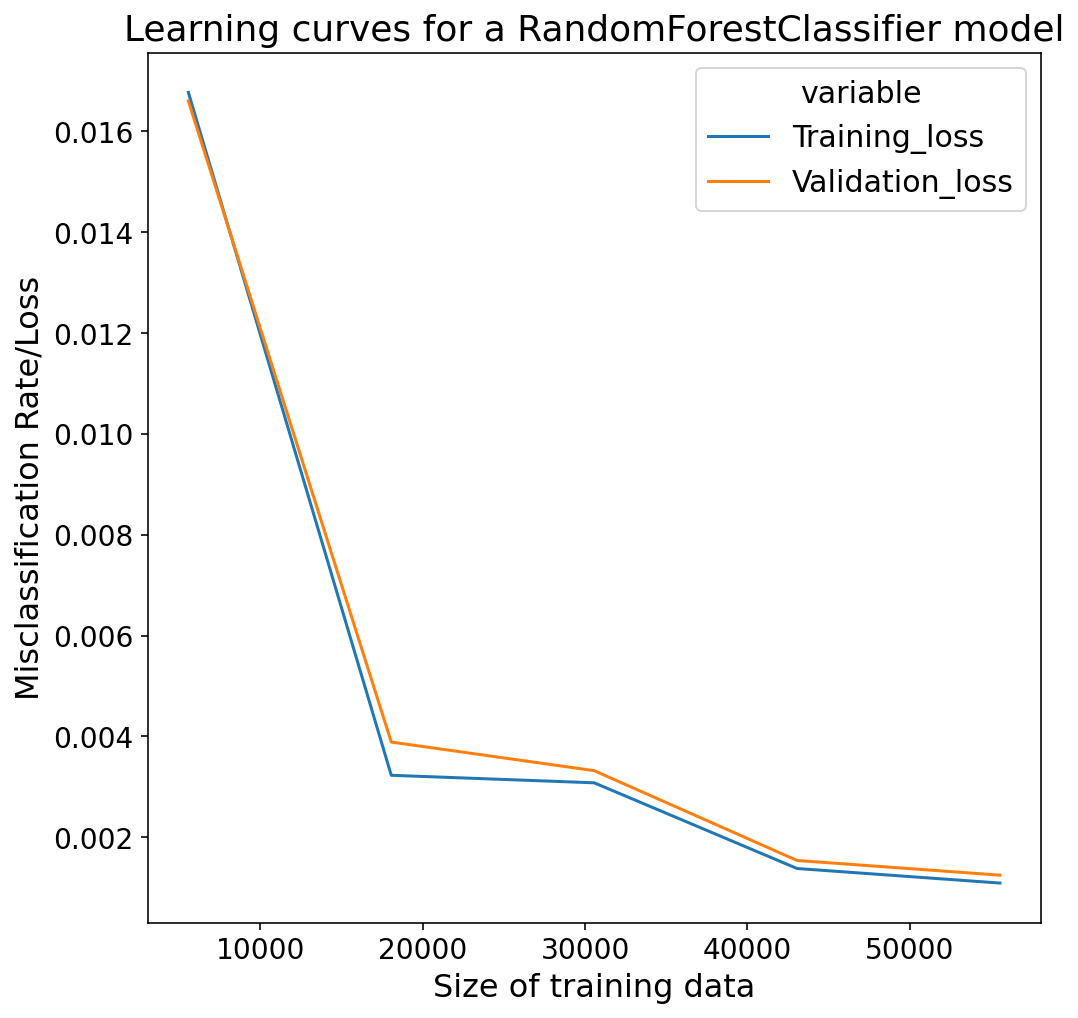

In [ ]:
plot_learning_curvee(rf)

  Mean Cross Validation Accuracy:
-------------------------
0.999951401263567

  Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00010372791572059272

  Training Accuracy:
---------------
0.9999514051996437




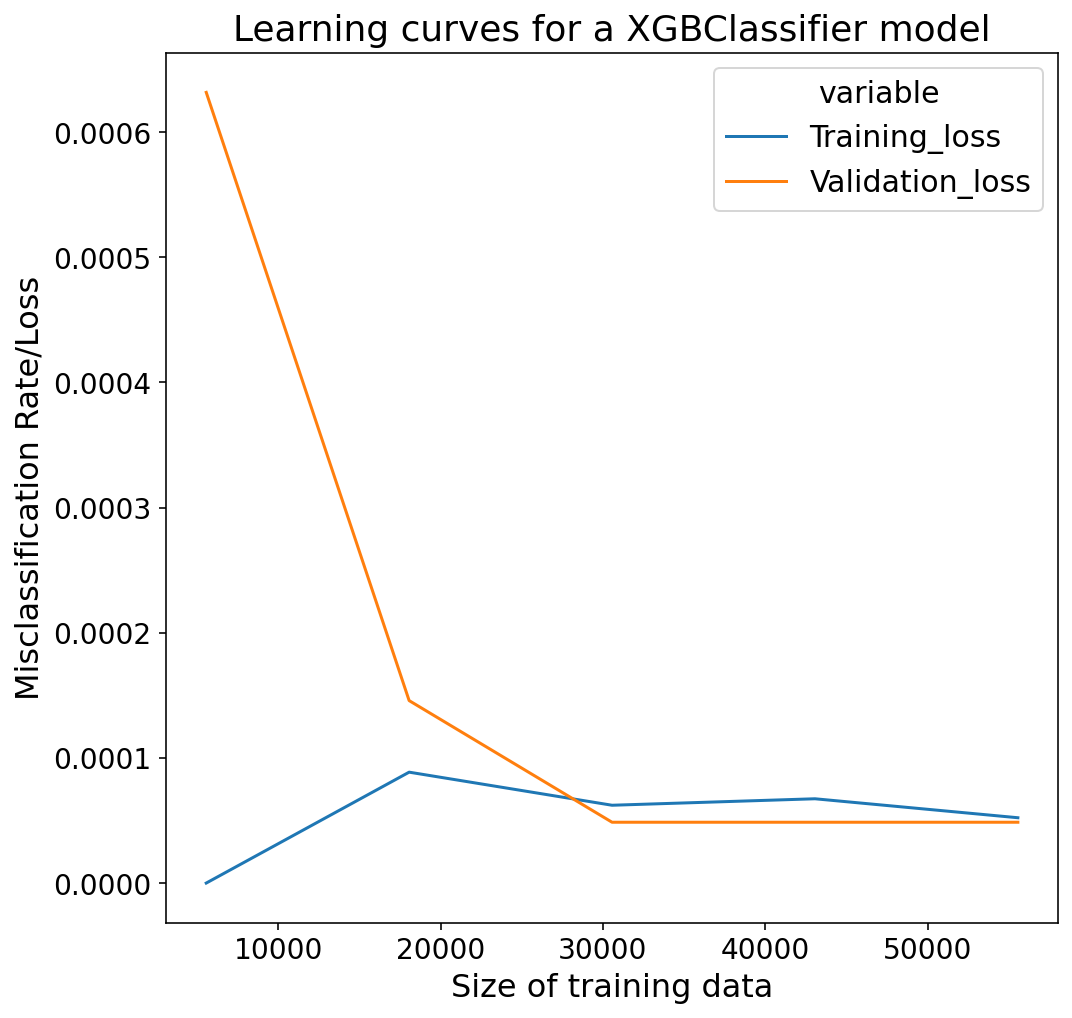

In [ ]:
plot_learning_curvee(tunedxgbmodel)

  Mean Cross Validation Accuracy:
-------------------------
0.9887098329029452

  Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0016278449279610867

  Training Accuracy:
---------------
0.9886936097837531




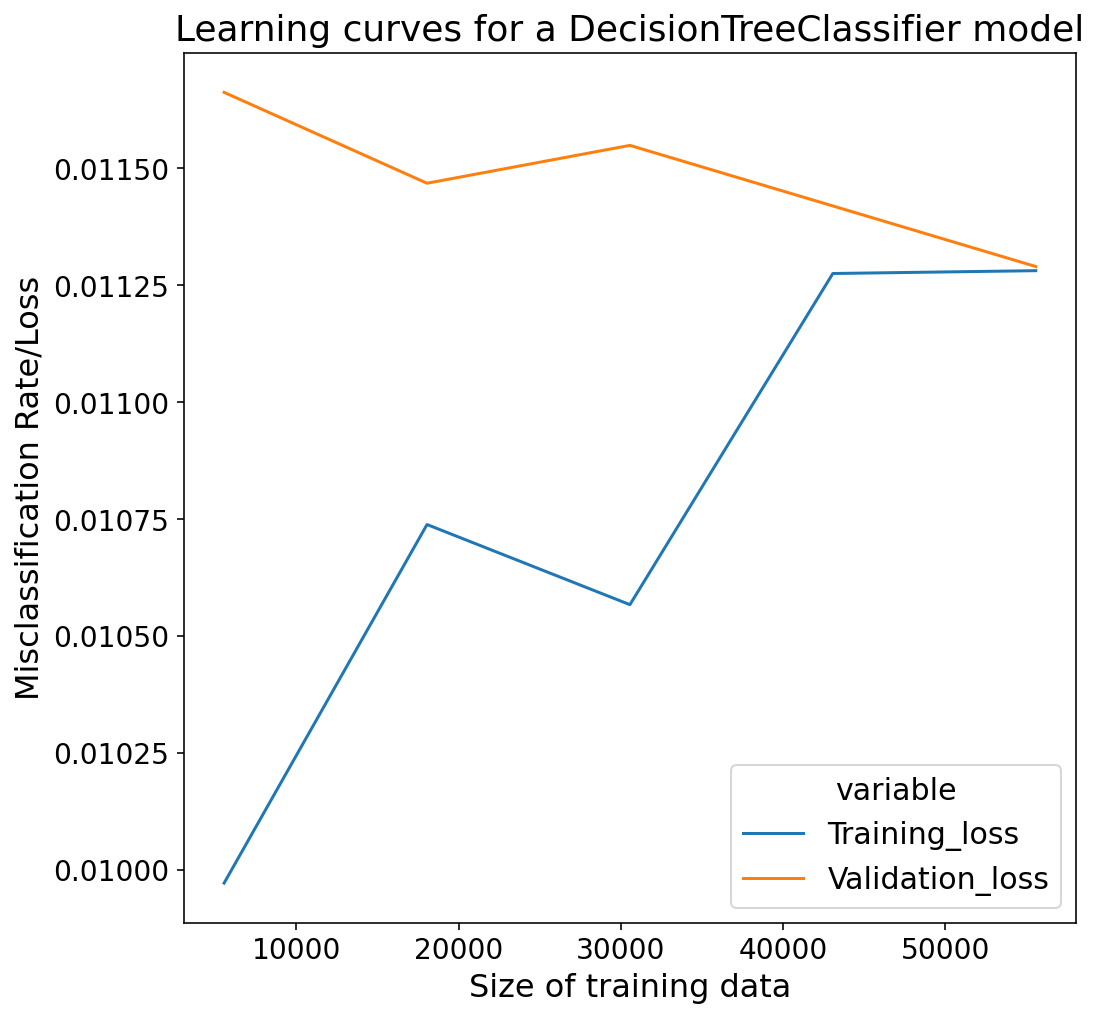

In [ ]:
plot_learning_curvee(tree)

####**Task 4.5 Bias and Variance Analysis**

In [ ]:
#Function for getting varieance and bias
def print_variance_and_bias(y_pred):
  variance = np.var(y_pred)
  SSE = np.mean((np.mean(y_pred)-y)**2)
  print("variance  : {1}",variance)
  bias = SSE-variance
  print("Bias: {1}",bias)
  standard_deviation = np.std(y_pred)
  print("Standard Deviation: {1}",standard_deviation)
  return bias, variance, standard_deviation

In [ ]:
#Taking bias, variance and standard deviation
bias_variance_df = pd.DataFrame(
    columns=["Bias", "Variance", "Standard_Deviation"], dtype="float64"
)


Getting the bias, variance and standard deviation for all the models.

In [ ]:
print("Random Forest")
bias, variance, std = print_variance_and_bias(y_predict_rf_tuned)
bias_variance_df.loc["Random Forest"] = (
    bias,
    variance, std)

Random Forest
variance  : {1} 0.2491803689134193
Bias: {1} 0.0016392621731613766
Standard Deviation: {1} 0.4991796960147912


In [ ]:
print("Logistic Regression")
bias_nb, variance_nb, nb_std = print_variance_and_bias(y_predict_lr)
bias_variance_df.loc["Logistic Regression"] = (
    bias_nb,
    variance_nb, nb_std)

Logistic Regression
variance  : {1} 0.24998255874613612
Bias: {1} 3.488250772776258e-05
Standard Deviation: {1} 0.4999825584419282


In [ ]:
print("Gradient Boosting")
bias_xgb, variance_xgb, std_xgb = print_variance_and_bias(y_predict_gb)
bias_variance_df.loc["Gradient Boosting"] = (
    bias_xgb,
    variance_xgb, std_xgb)

Gradient Boosting
variance  : {1} 0.24565792769798683
Bias: {1} 0.008684144604026334
Standard Deviation: {1} 0.49563890857960985


In [ ]:
print("Decision Tree")
bias_knn, variance_knn, std_knn = print_variance_and_bias(y_pred_dt)
bias_variance_df.loc["Decision Tree"] = (
    bias_knn,
    variance_knn, std_knn)

Decision Tree
variance  : {1} 0.24409334641630087
Bias: {1} 0.011813307167398202
Standard Deviation: {1} 0.4940580395219785


In [ ]:
print("XGBoost")
bias_xg, variance_xg, std_xg = print_variance_and_bias(y_xgb_pred)
bias_variance_df.loc["XG Boosting"] = (
    bias_xg,
    variance_xg, std_xg)

XGBoost
variance  : {1} 0.24770155513420072
Bias: {1} 0.004596889731598552
Standard Deviation: {1} 0.49769624786027944


In [ ]:
bias_variance_df

,Bias,Variance,Standard_Deviation
Random Forest,0.00,0.25,0.50
Logistic Regression,0.00,0.25,0.50
Gradient Boosting,0.01,0.25,0.50
Decision Tree,0.01,0.24,0.49
XG Boosting,0.00,0.25,0.50


Apply t-test to compare the models.

In [ ]:
#Using paired t test 5x2cv for evaluation
# compare random forest and xgboost
t, p = paired_ttest_5x2cv(estimator1=tunedxgbmodel, estimator2=rf_model, X=X_test_std, y=y_test, scoring='accuracy')
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

# Compare gradient boosting and random forest
t, p = paired_ttest_5x2cv(estimator1=gb_model, estimator2=rf_model, X=X_test_std, y=y_test, scoring='accuracy')
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

# Compare gradient boosting and linear regression
t, p = paired_ttest_5x2cv(estimator1=gb_model, estimator2=lr_model, X=X_test_std, y=y_test, scoring='accuracy')
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

P-value: 0.481, t-Statistic: 0.761
Algorithms probably have the same performance
P-value: 0.807, t-Statistic: -0.258
Algorithms probably have the same performance
P-value: 0.000, t-Statistic: 52.519
Difference between mean performance is probably real


####**Task 4.6 Analysis of Models**



*   As we know no machine learning model is a particularly suitable for a particular dataset we modelled the data using multiple algorithms. We have used bagging, boosting models and other classification models.

* Once we trained and hyperparameterd tuned the model we could see random forest performed better with an accuracy of 97%. Boosting models lik XG Boost and Gradient Boosting came close to random forest model with 95 and 92 but could not quite produce the results.

* As we know accuracy is not the only measure to identify the model. We plotted the learning curvues and could see random forest model training and validation loss is close together. 

* The validation loss of Gradientboosting and logistic regression is higher compared to training loss which is not ideal. And that is the reason we did not chose those models.

* Next, we also calculated bias and variance of each model to check the bias and variance tradeoff. Compared to all the models random forest model has less bias and less variance. Some models like logistic regression has more bias compared to any other models with bias value of more than 3.

* Also, to compare the models we had calculated the standard deviation of all the models and could see that most of the models are has same but with a slight difference.


REFERENCES:

[1] A. Jain, “Gradient boosting: Hyperparameter tuning python,” Analytics Vidhya, 15-Jun-2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/. [Accessed: 17-Nov-2022]. <br>
[2] D. Contractor, “Smoke detection dataset,” Kaggle, 21-Aug-2022. [Online]. Available: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset. [Accessed: 15-Nov-2022]. 
<br>[3] J. Brownlee, “Avoid overfitting by early stopping with XGBoost in python,” MachineLearningMastery.com, 27-Aug-2020. [Online]. Available: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/. [Accessed: 17-Nov-2022]. 
<br>[4] K. S. V. Muralidhar, “Learning curve to identify overfitting and underfitting in machine learning,” Medium, 22-Feb-2021. [Online]. Available: https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5. [Accessed: 17-Nov-2022]. 
<br>[5] Rrohan.Arrora, “Random Forest Interpretation,” Medium, 01-Oct-2019. [Online]. Available: https://medium.com/analytics-vidhya/rf-interpretation-season-1-e4bdbd10e0fe. [Accessed: 17-Nov-2022]. 
<br>[6] S. Blattmann, “Real-time smoke detection with AI-based sensor fusion,” Hackster.io, 03-Aug-2022. [Online]. Available: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6. [Accessed: 25-Nov-2022]. 
<br>[7] “Sklearn.ensemble.gradientboostingclassifier,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. [Accessed: 18-Nov-2022]. 
<br>[8] “Sklearn.ensemble.randomforestclassifier,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: 21-Nov-2022]. 
<br>[9] “Sklearn.linear_model.logisticregression,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. [Accessed: 21-Nov-2022]. 
<br>[10] “Sklearn.tree.decisiontreeclassifier,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. [Accessed: 21-Nov-2022]. 
<br>[11] “XGBoost documentation,” XGBoost Documentation - xgboost 1.7.2 documentation. [Online]. Available: https://xgboost.readthedocs.io/en/stable/index.html. [Accessed: 17-Nov-2022]. 
